# Import datasets

In [1]:
import numpy as np
import pandas as pd
import pickle

def load_dataset(dsname):
    metadata = pd.read_csv(f"/datasets/nicolas_facchinetti/processed_data/{dsname}/metadata_final.csv")
    x = pickle.load(open(f"/datasets/nicolas_facchinetti/processed_data/{dsname}/processed_data0.p", "rb" ))
    y = pickle.load(open(f"/datasets/nicolas_facchinetti/processed_data/{dsname}/processed_labels.p", "rb" ))
    return metadata, x, y

In [2]:
from sklearn.preprocessing import StandardScaler
def standardize(data):
    scaler = StandardScaler()
    n = data.shape
    return scaler.fit_transform(data.reshape(n[0],-1)).reshape(n)

In [3]:
datasets = ["emodb", "emovo", "ravdess"]
data = {}
for d in datasets:
    md, x, y = load_dataset(d)
    data[d] = {}
    data[d]["x"] = standardize(x)
    data[d]["y"] = y
    data[d]["metadata"] = md

In [4]:
data['emodb']['x'][0]

array([[[1.0508965 ],
        [0.45340493],
        [0.90310585],
        ...,
        [1.1159189 ],
        [1.1121945 ],
        [1.1117905 ]],

       [[0.6955967 ],
        [0.16441736],
        [0.40496677],
        ...,
        [1.1087862 ],
        [1.1082361 ],
        [1.1074913 ]],

       [[0.60865915],
        [0.01374029],
        [0.2268114 ],
        ...,
        [1.0928285 ],
        [1.1059525 ],
        [1.1100743 ]],

       ...,

       [[0.8017341 ],
        [0.97662485],
        [0.31735677],
        ...,
        [1.0694526 ],
        [1.091225  ],
        [1.1004032 ]],

       [[0.8094617 ],
        [0.98400015],
        [0.30769482],
        ...,
        [1.0719686 ],
        [1.0963826 ],
        [1.1034008 ]],

       [[0.79332876],
        [1.2878755 ],
        [0.30874625],
        ...,
        [1.0751833 ],
        [1.0952688 ],
        [1.1052506 ]]], dtype=float32)

# Define architectures

In [5]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, LSTM, TimeDistributed, InputLayer, Reshape, BatchNormalization, Bidirectional

2022-12-20 16:26:07.965310: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Search the best architecture

In [6]:
def get_m():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
            TimeDistributed(Conv2D(16, kernel_size=(5,5), activation='relu')),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(4,4), strides=2)),

            TimeDistributed(Conv2D(32, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),
            TimeDistributed(Conv2D(64, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            LSTM(3, return_sequences=False, dropout=0.2),
            Dense(5, activation='softmax')
    ])
    return m

get_m().summary()

2022-12-20 16:26:08.713269: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-20 16:26:08.714132: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-12-20 16:26:08.824265: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:15:00.0 name: NVIDIA TITAN V computeCapability: 7.0
coreClock: 1.455GHz coreCount: 80 deviceMemorySize: 11.77GiB deviceMemoryBandwidth: 607.97GiB/s
2022-12-20 16:26:08.824322: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-12-20 16:26:08.827416: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-12-20 16:26:08.827508: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed (TimeDistri (None, 9, 25, 124, 16)    416       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 9, 25, 124, 16)    64        
_________________________________________________________________
time_distributed_2 (TimeDist (None, 9, 11, 61, 16)     0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 9, 9, 59, 32)      4640      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 9, 4, 29, 32)      0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 9, 2, 27, 64)      1

In [7]:
def get_m1():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
            TimeDistributed(Conv2D(16, kernel_size=(5,5), activation='relu')),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(4,4), strides=2)),

            TimeDistributed(Conv2D(32, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),

            TimeDistributed(Conv2D(64, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),

            Bidirectional(LSTM(3, dropout=0.2, return_sequences=False)),
            Dense(5, activation='softmax')
    ])
    return m

get_m1().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed_8 (TimeDist (None, 9, 25, 124, 16)    416       
_________________________________________________________________
time_distributed_9 (TimeDist (None, 9, 25, 124, 16)    64        
_________________________________________________________________
time_distributed_10 (TimeDis (None, 9, 11, 61, 16)     0         
_________________________________________________________________
time_distributed_11 (TimeDis (None, 9, 9, 59, 32)      4640      
_________________________________________________________________
time_distributed_12 (TimeDis (None, 9, 4, 29, 32)      0         
_________________________________________________________________
time_distributed_13 (TimeDis (None, 9, 2, 27, 64)     

In [8]:
def get_m2():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
            TimeDistributed(Conv2D(16, kernel_size=(5,5), activation='relu')),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(4,4), strides=2)),

            TimeDistributed(Conv2D(32, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),
            TimeDistributed(Conv2D(64, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            LSTM(6, return_sequences=False, dropout=0.2),
            Dense(5, activation='softmax')
        ])
    return m

get_m2().summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed_16 (TimeDis (None, 9, 25, 124, 16)    416       
_________________________________________________________________
time_distributed_17 (TimeDis (None, 9, 25, 124, 16)    64        
_________________________________________________________________
time_distributed_18 (TimeDis (None, 9, 11, 61, 16)     0         
_________________________________________________________________
time_distributed_19 (TimeDis (None, 9, 9, 59, 32)      4640      
_________________________________________________________________
time_distributed_20 (TimeDis (None, 9, 4, 29, 32)      0         
_________________________________________________________________
time_distributed_21 (TimeDis (None, 9, 2, 27, 64)     

In [9]:
def get_m3():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
            TimeDistributed(Conv2D(16, kernel_size=(3,3), activation='relu')),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),

            TimeDistributed(Conv2D(32, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),
            TimeDistributed(Conv2D(64, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            LSTM(3, return_sequences=False, dropout=0.2),
            Dense(5, activation='softmax')
    ])
    return m

get_m3().summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed_24 (TimeDis (None, 9, 27, 126, 16)    160       
_________________________________________________________________
time_distributed_25 (TimeDis (None, 9, 27, 126, 16)    64        
_________________________________________________________________
time_distributed_26 (TimeDis (None, 9, 13, 63, 16)     0         
_________________________________________________________________
time_distributed_27 (TimeDis (None, 9, 11, 61, 32)     4640      
_________________________________________________________________
time_distributed_28 (TimeDis (None, 9, 5, 30, 32)      0         
_________________________________________________________________
time_distributed_29 (TimeDis (None, 9, 3, 28, 64)     

In [10]:
def get_m4():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
            TimeDistributed(Conv2D(16, kernel_size=(5,5), activation='relu')),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),

            TimeDistributed(Conv2D(32, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),
            TimeDistributed(Conv2D(64, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            LSTM(6, return_sequences=False, dropout=0.2),
            Dense(5, activation='softmax')
    ])
    return m

get_m4().summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed_32 (TimeDis (None, 9, 25, 124, 16)    416       
_________________________________________________________________
time_distributed_33 (TimeDis (None, 9, 25, 124, 16)    64        
_________________________________________________________________
time_distributed_34 (TimeDis (None, 9, 12, 62, 16)     0         
_________________________________________________________________
time_distributed_35 (TimeDis (None, 9, 10, 60, 32)     4640      
_________________________________________________________________
time_distributed_36 (TimeDis (None, 9, 5, 30, 32)      0         
_________________________________________________________________
time_distributed_37 (TimeDis (None, 9, 3, 28, 64)     

In [11]:
def get_m5():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
            TimeDistributed(Conv2D(32, kernel_size=(5,5), activation='relu')),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(4,4), strides=2)),

            TimeDistributed(Conv2D(64, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),
            TimeDistributed(Conv2D(128, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            LSTM(3, return_sequences=False, dropout=0.2),
            Dense(5, activation='softmax')
    ])
    return m

get_m5().summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed_40 (TimeDis (None, 9, 25, 124, 32)    832       
_________________________________________________________________
time_distributed_41 (TimeDis (None, 9, 25, 124, 32)    128       
_________________________________________________________________
time_distributed_42 (TimeDis (None, 9, 11, 61, 32)     0         
_________________________________________________________________
time_distributed_43 (TimeDis (None, 9, 9, 59, 64)      18496     
_________________________________________________________________
time_distributed_44 (TimeDis (None, 9, 4, 29, 64)      0         
_________________________________________________________________
time_distributed_45 (TimeDis (None, 9, 2, 27, 128)    

In [12]:
def get_m6():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
            TimeDistributed(Conv2D(16, kernel_size=(5,5), activation='relu')),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),

            TimeDistributed(Conv2D(32, kernel_size=(5,5), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),

            TimeDistributed(Conv2D(64, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
        
            TimeDistributed(Conv2D(128, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),

            LSTM(3, dropout=0.2, return_sequences=False),
            Dense(5, activation='softmax')
    ])
    return m

get_m6().summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed_48 (TimeDis (None, 9, 25, 124, 16)    416       
_________________________________________________________________
time_distributed_49 (TimeDis (None, 9, 25, 124, 16)    64        
_________________________________________________________________
time_distributed_50 (TimeDis (None, 9, 12, 62, 16)     0         
_________________________________________________________________
time_distributed_51 (TimeDis (None, 9, 8, 58, 32)      12832     
_________________________________________________________________
time_distributed_52 (TimeDis (None, 9, 7, 57, 32)      0         
_________________________________________________________________
time_distributed_53 (TimeDis (None, 9, 5, 55, 64)     

In [13]:
archs = [get_m, get_m1, get_m2, get_m3, get_m4, get_m5, get_m6]

# Search best architecturs for all datasets

In [17]:
def train_evaluate(model_fn, train, val, test, opt='adam'):
    m = model_fn()
    m.compile(loss='categorical_crossentropy', optimizer=opt, metrics='accuracy')
    
    earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min', restore_best_weights=True)
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=6, verbose=0, min_delta=1e-4, mode='min')

    # fit & predict
    history = m.fit(train[0], train[1],
                    epochs=50,
                    batch_size=32,
                    callbacks=[earlyStopping, reduce_lr_loss],
                    validation_data=(val[0], val[1]),
                    verbose=0)
    # test
    results = m.evaluate(test[0], test[1], batch_size=32, verbose=0)
    print("\t\tTest loss, test acc:", results)
    return history, results

In [18]:
from sklearn.model_selection import train_test_split

def train_test_kfold(model_fn, x, y, metadata, n=[1997,1941,1965]):    
    results = []
    
    train_df, test_df = train_test_split(metadata, 
                                   test_size = 0.1, 
                                   random_state = 2022,
                                   stratify = metadata['label'])
    test_index = test_df.index
    x_test = x[test_index]
    y_test = y[test_index]
    for num, rs in enumerate(n):
        trainK_df, val_df = train_test_split(train_df, 
                                   test_size = 0.15, 
                                   random_state = rs,
                                   stratify = train_df['label'])
        train_index = trainK_df.index
        val_index = val_df.index
        x_train = x[train_index]
        y_train = y[train_index]
        x_val = x[val_index]
        y_val = y[val_index]
        
        print(f"\t\tFold {num+1}")
        results.append(train_evaluate(model_fn, (x_train, y_train), (x_val, y_val), (x_test, y_test)))
    return results

In [19]:
from sklearn.model_selection import cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

results_arch = {}
for count, a in enumerate(archs):
    print(f'Architecture {count} of {len(archs)-1}')
    results_arch[f"m{count}"] = {}
    for d in data:
        print(f"\tTraining on {d}")
        x = data[d]["x"]
        y = data[d]["y"]
        metadata = data[d]["metadata"]
        res = train_test_kfold(a, x, y, metadata)
        results_arch[f"m{count}"][d] = res

Architecture 0 of 6
	Training on emodb
		Fold 1
		Test loss, test acc: [1.0185089111328125, 0.5680000185966492]
		Fold 2
		Test loss, test acc: [0.8235790133476257, 0.6933333277702332]
		Fold 3
		Test loss, test acc: [0.9534400105476379, 0.6426666378974915]
	Training on emovo
		Fold 1
		Test loss, test acc: [0.8964673280715942, 0.7105262875556946]
		Fold 2
		Test loss, test acc: [1.041751503944397, 0.5870445370674133]
		Fold 3
		Test loss, test acc: [0.8792225122451782, 0.6862348318099976]
	Training on ravdess
		Fold 1
		Test loss, test acc: [0.8854299187660217, 0.6696428656578064]
		Fold 2
		Test loss, test acc: [1.3368504047393799, 0.4408482015132904]
		Fold 3
		Test loss, test acc: [1.0433571338653564, 0.5881696343421936]
Architecture 1 of 6
	Training on emodb
		Fold 1
		Test loss, test acc: [0.4895443618297577, 0.8320000171661377]
		Fold 2
		Test loss, test acc: [0.5469816327095032, 0.8266666531562805]
		Fold 3
		Test loss, test acc: [0.5824370384216309, 0.7866666913032532]
	Traini

In [20]:
res = []

for s in results_arch:
    print(s)
    means = []
    for d in results_arch[s]:
        print(d)
        m = np.mean([p[1][1] for p in results_arch[s][d]])
        print(m)
        means.append(m)
    means.append(np.mean(means))
    res.append(means)
    print()

m0
emodb
0.6346666614214579
emovo
0.6612685521443685
ravdess
0.5662202338377634

m1
emodb
0.8151111205418905
emovo
0.7496626178423563
ravdess
0.7834821343421936

m2
emodb
0.7839999993642172
emovo
0.7307692368825277
ravdess
0.7291666666666666

m3
emodb
0.5777777830759684
emovo
0.2759784112373988
ravdess
0.3668154825766881

m4
emodb
0.739555557568868
emovo
0.5479082465171814
ravdess
0.4460565447807312

m5
emodb
0.23733332753181458
emovo
0.2273954153060913
ravdess
0.21316964427630106

m6
emodb
0.3395555565754573
emovo
0.2206477771202723
ravdess
0.23065476616223654



In [27]:
pd.DataFrame(res, columns=['emodb', 'emovo', 'ravdess', 'mean'], index=['m0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6'])

emodb     emovo   ravdess      mean
m0  0.634667  0.661269  0.566220  0.620718
m1  0.815111  0.749663  0.783482  0.782752
m2  0.784000  0.730769  0.729167  0.747979
m3  0.577778  0.275978  0.366815  0.406857
m4  0.739556  0.547908  0.446057  0.577840
m5  0.237333  0.227395  0.213170  0.225966
m6  0.339556  0.220648  0.230655  0.263619

In [22]:
import matplotlib.pyplot as plt

def plot_res_acc(h, x, y):
    plt.subplot(x, 2, y)
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
def plot_res_loss(h, x, y):
    plt.subplot(x, 2, y)
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
def plot_stats(h):
    fig = plt.gcf()
    fig.set_size_inches(15, 15)
    for num, c in enumerate(h):
        n = (num+1)*2
        plot_res_acc(c, len(h), n-1)
        plot_res_loss(c, len(h), n)
    plt.show()

m0
emodb


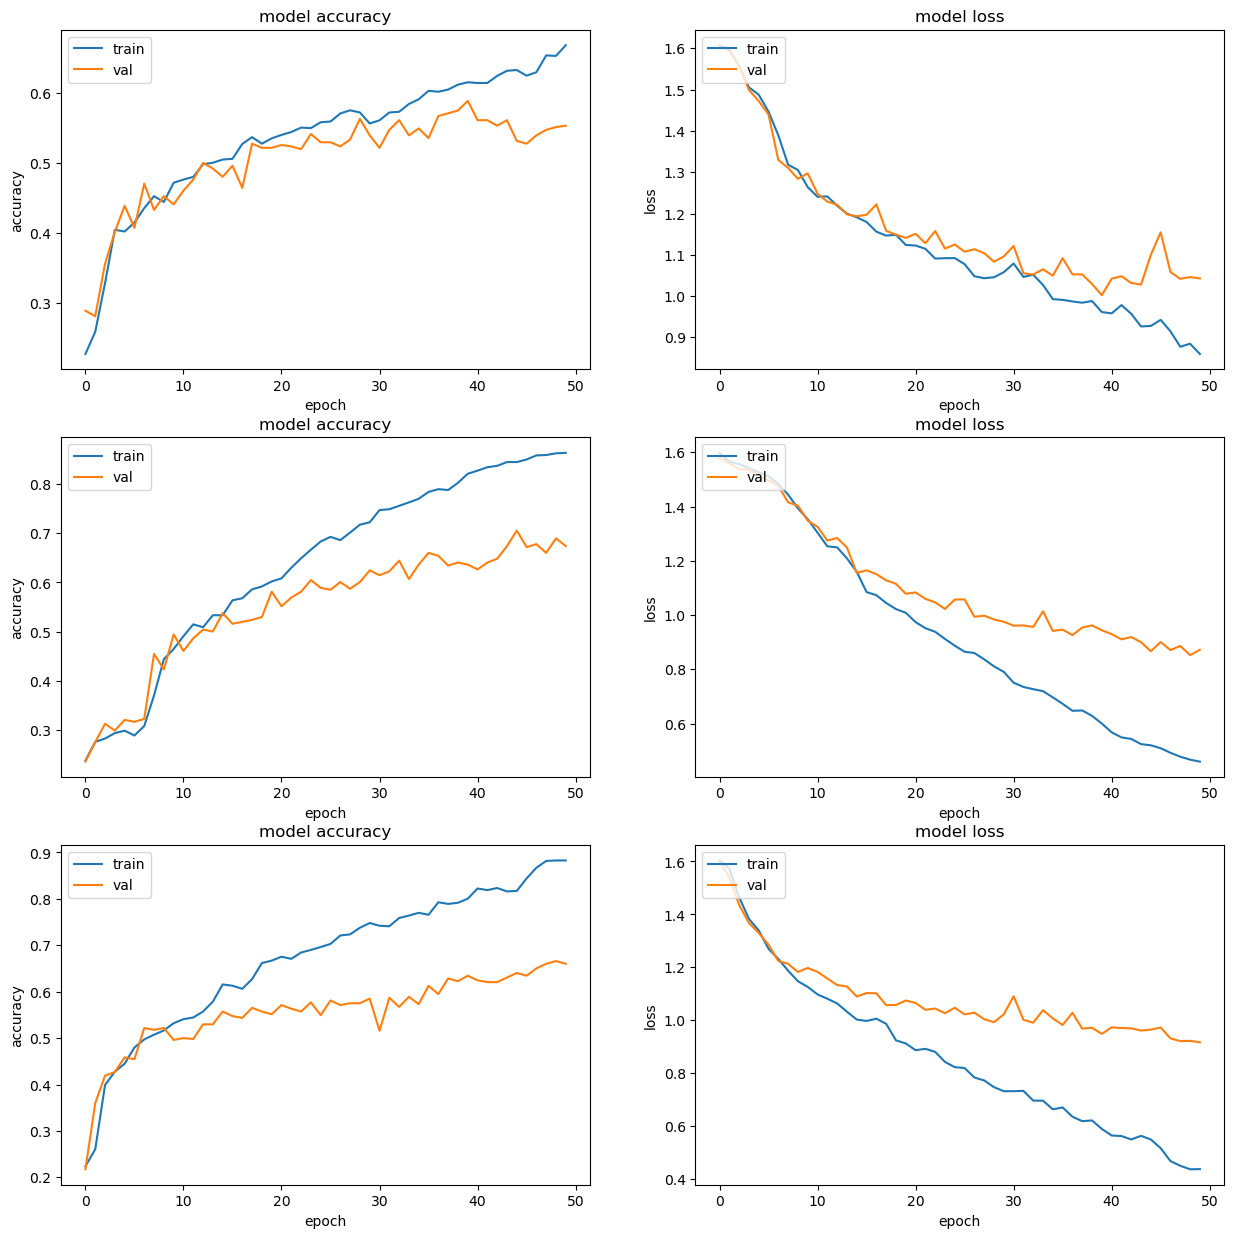

emovo


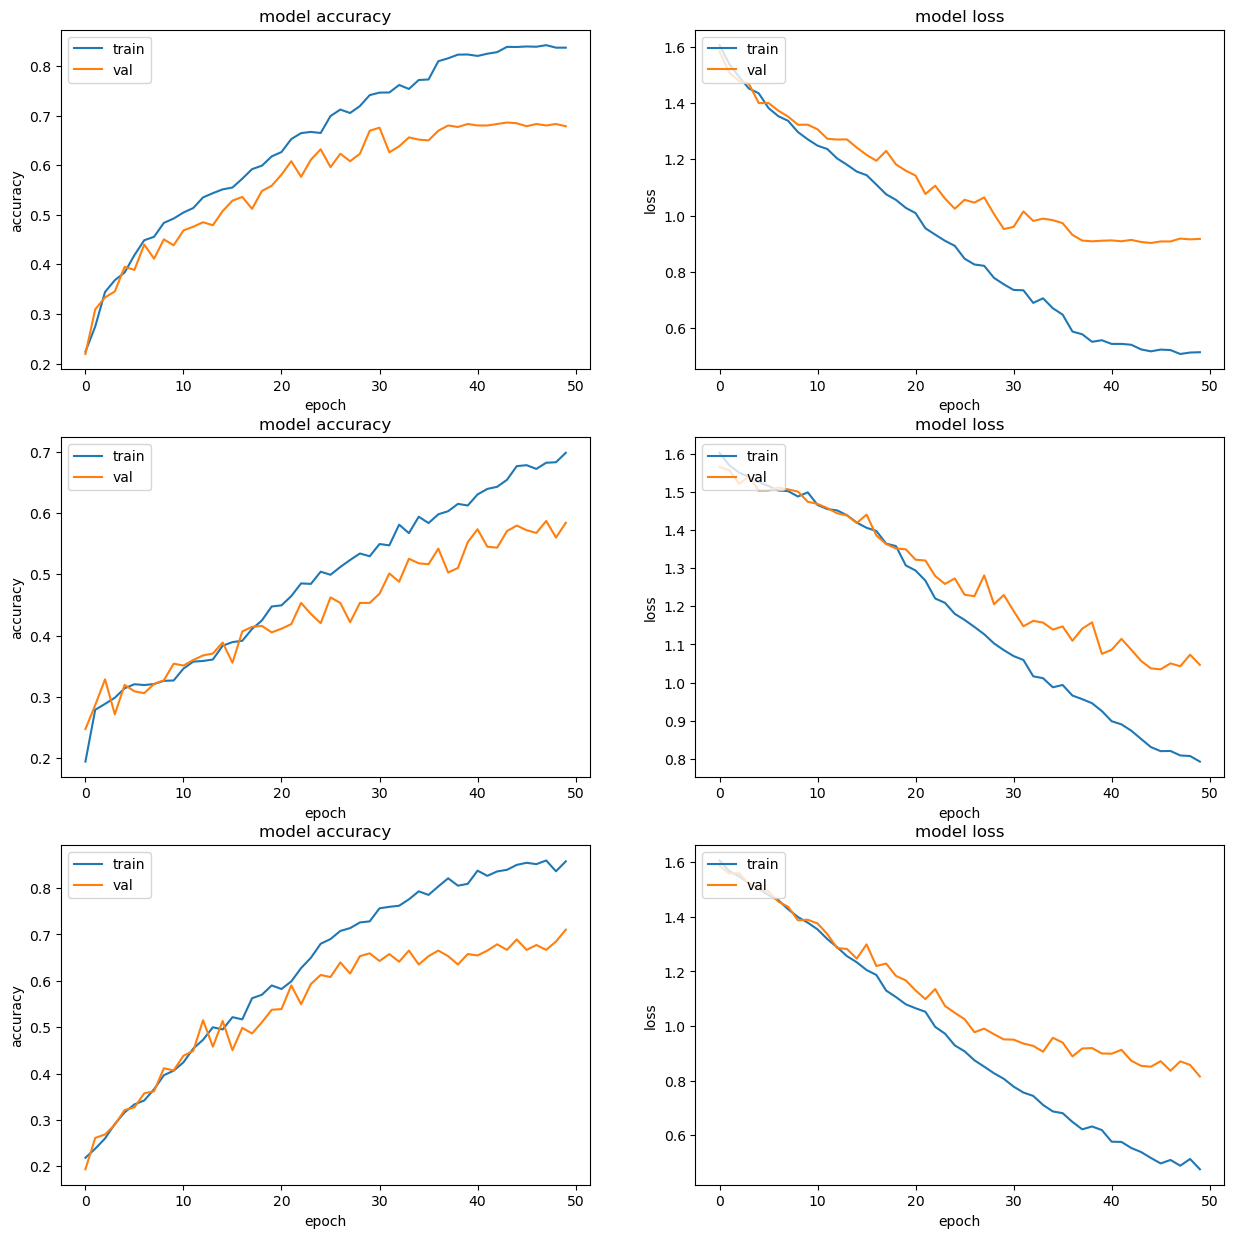

ravdess


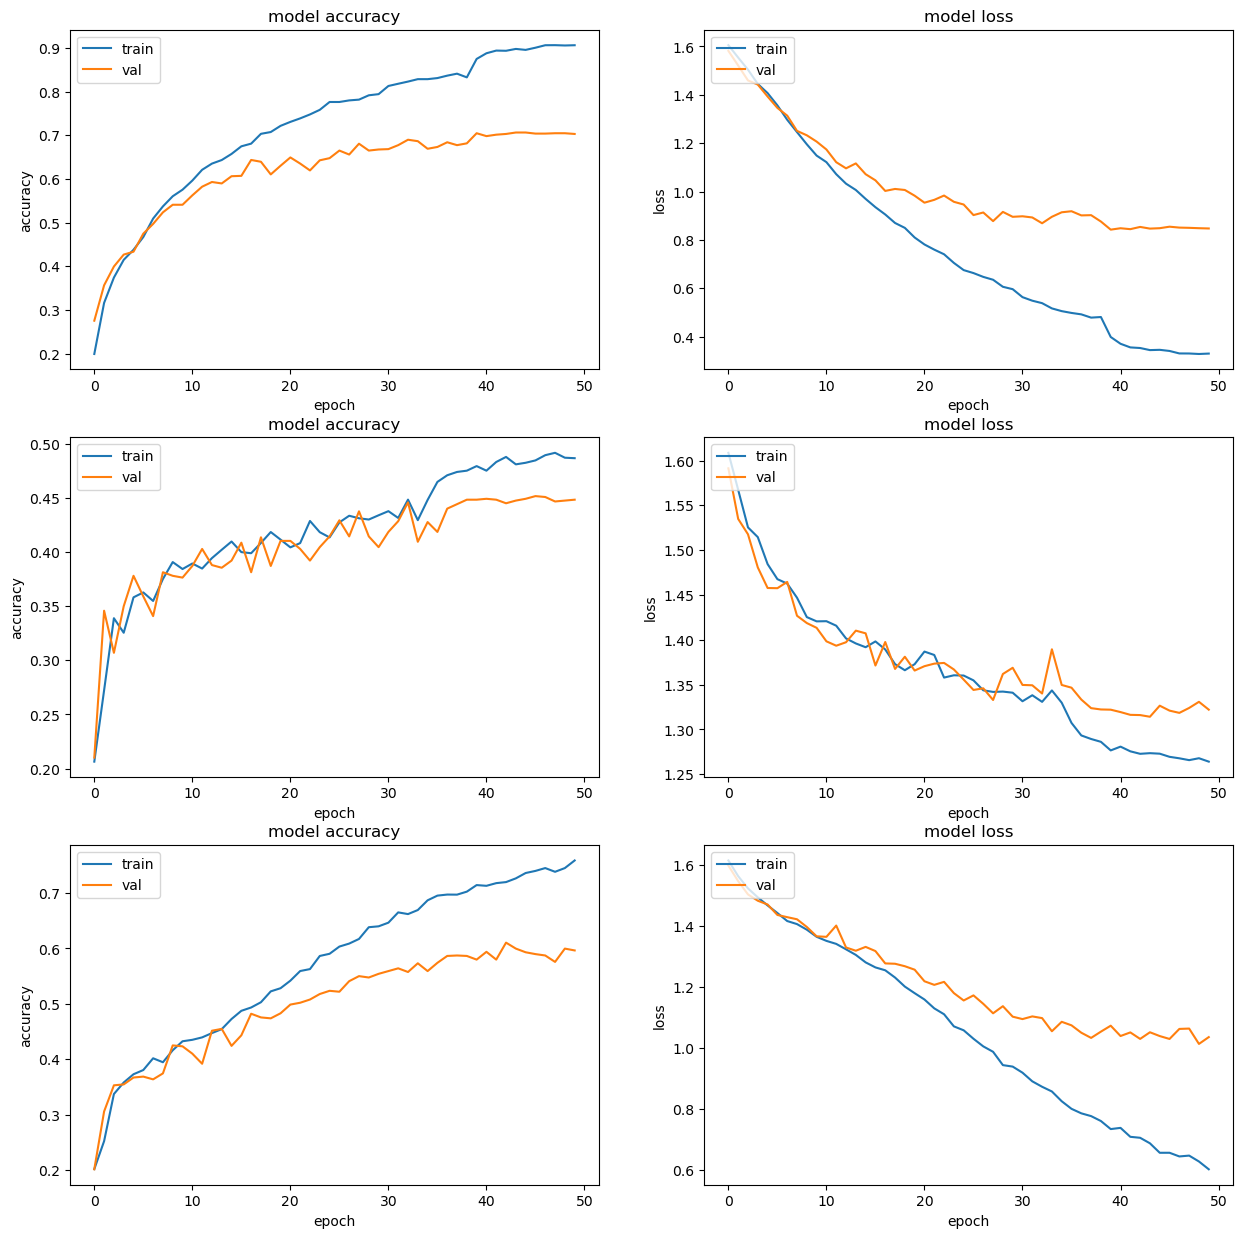


m1
emodb


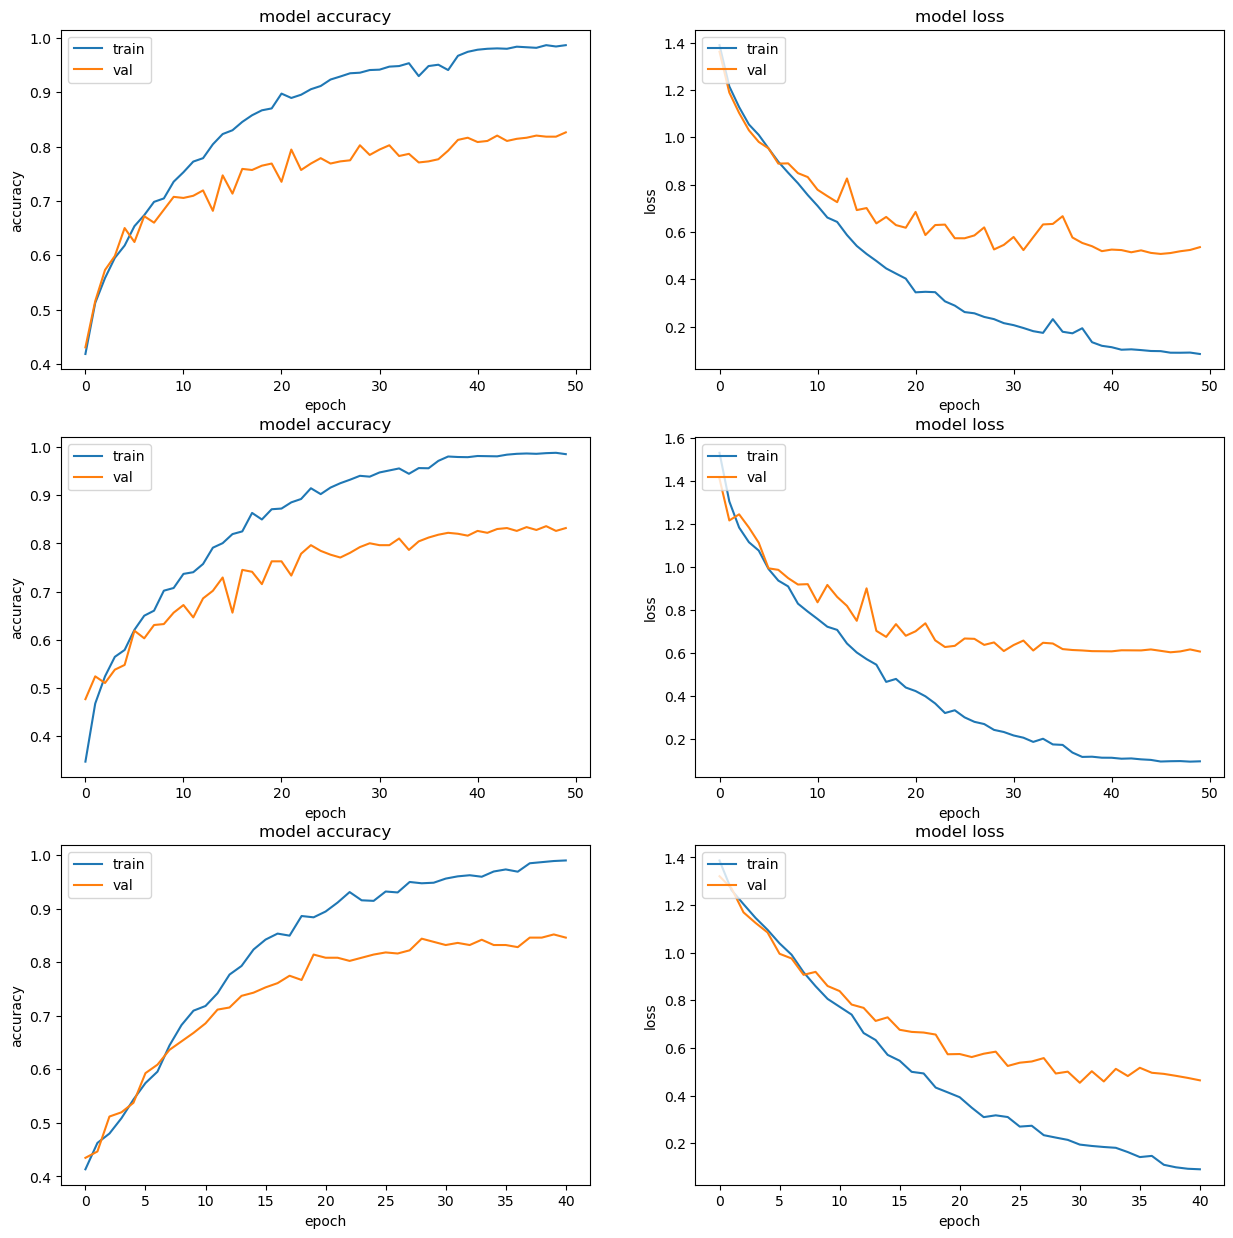

emovo


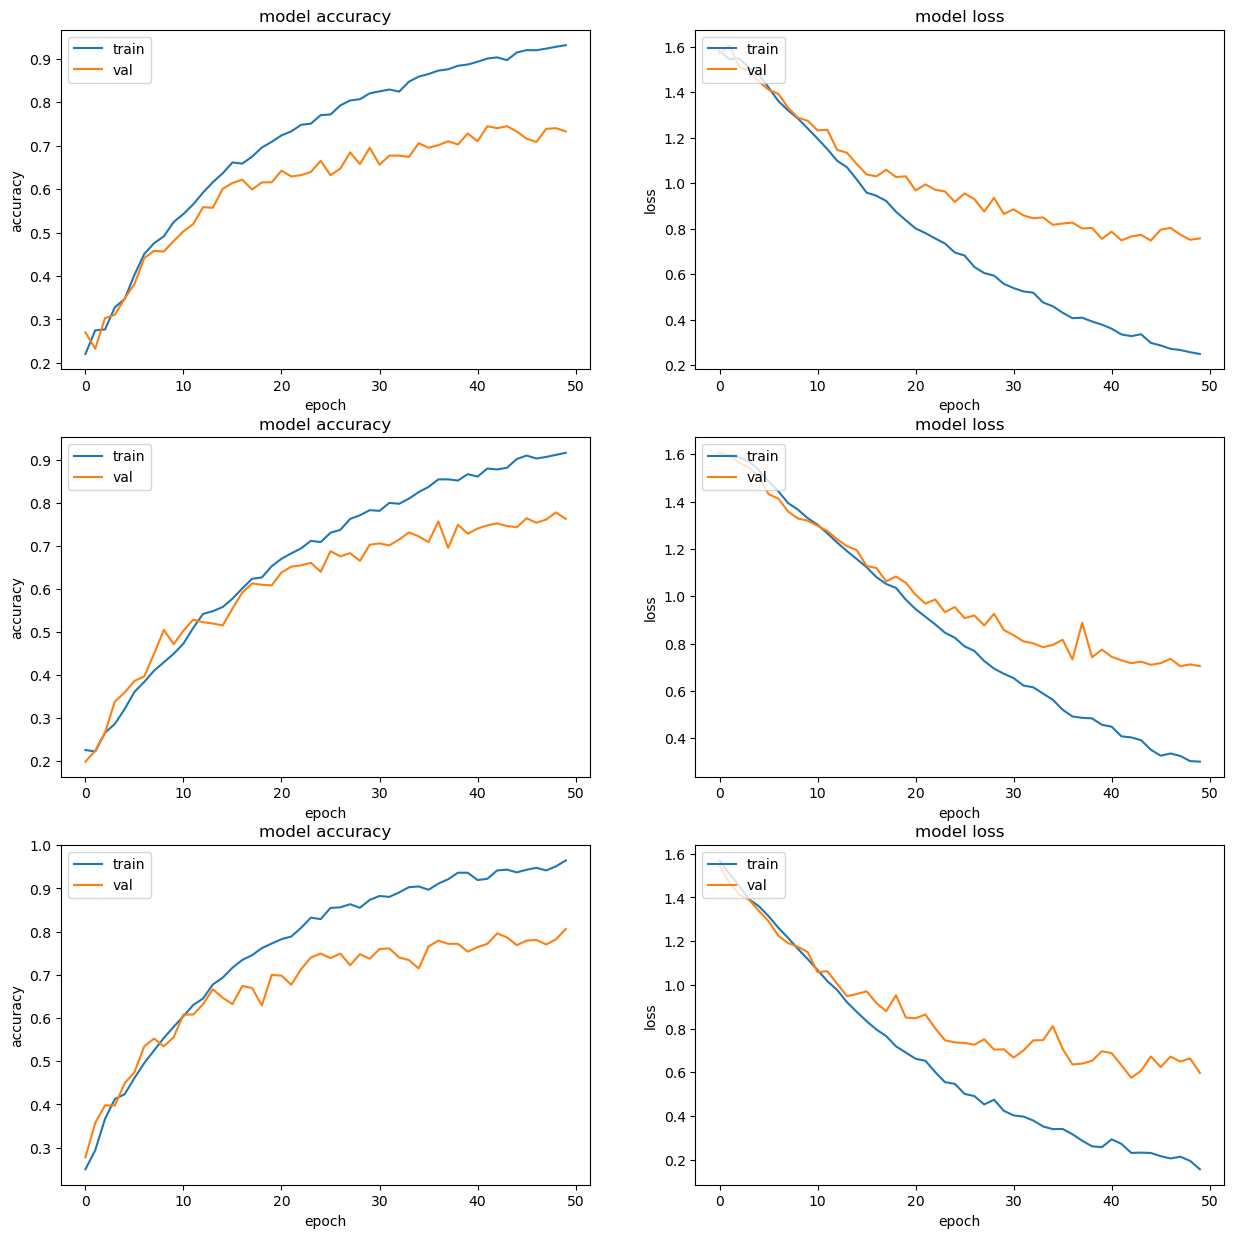

ravdess


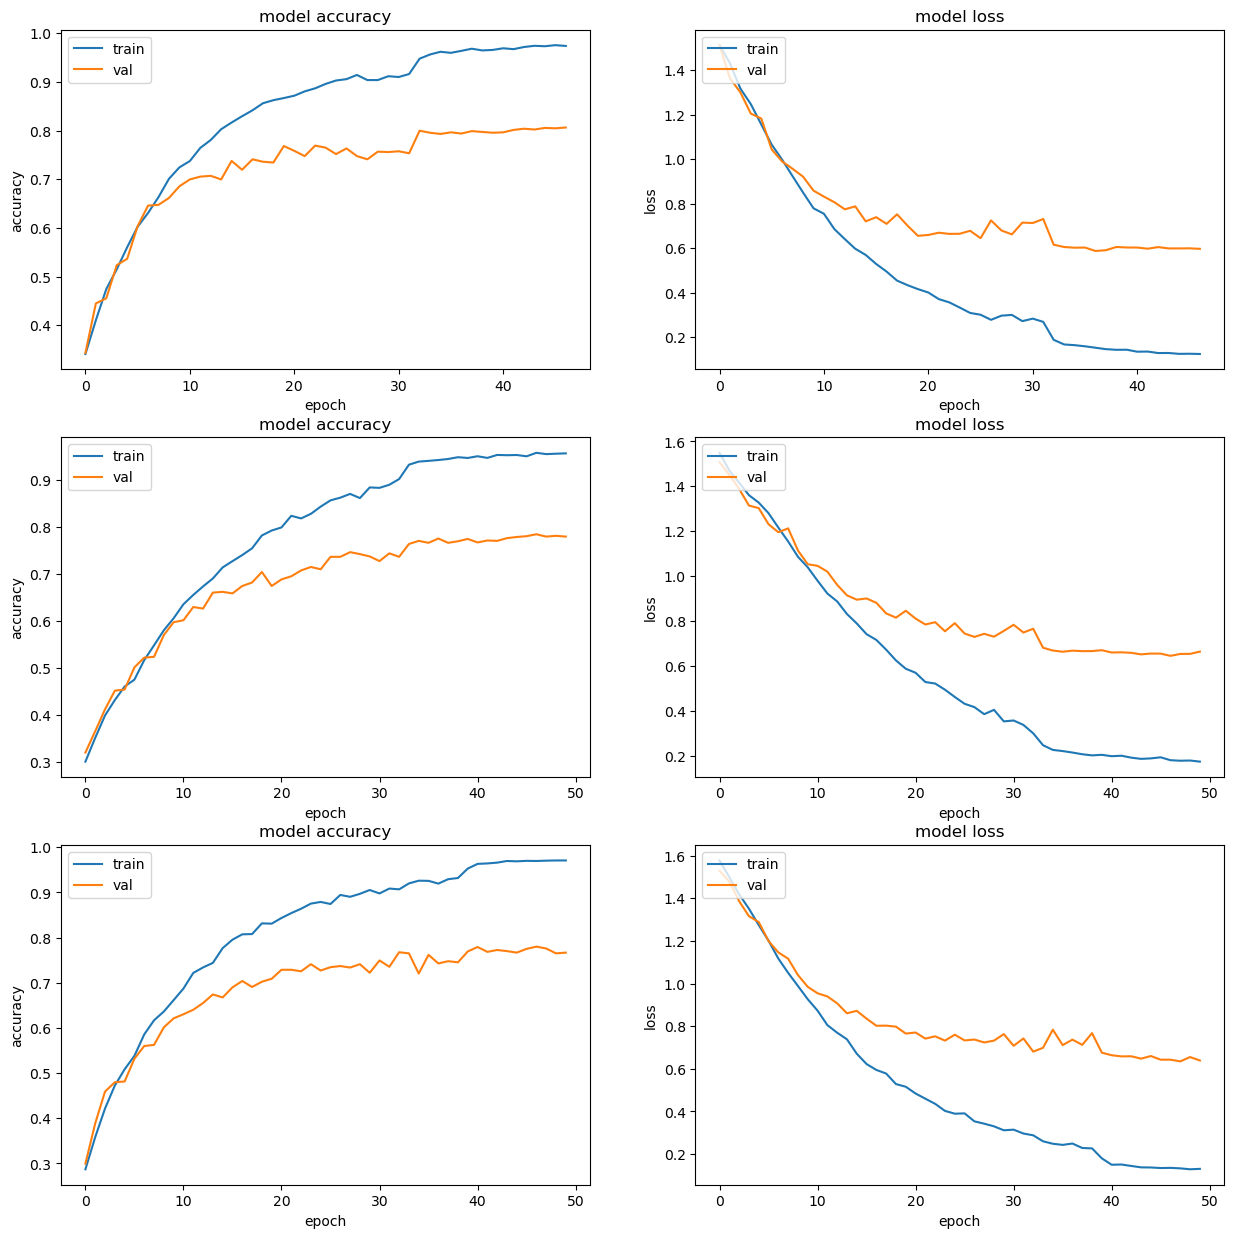


m2
emodb


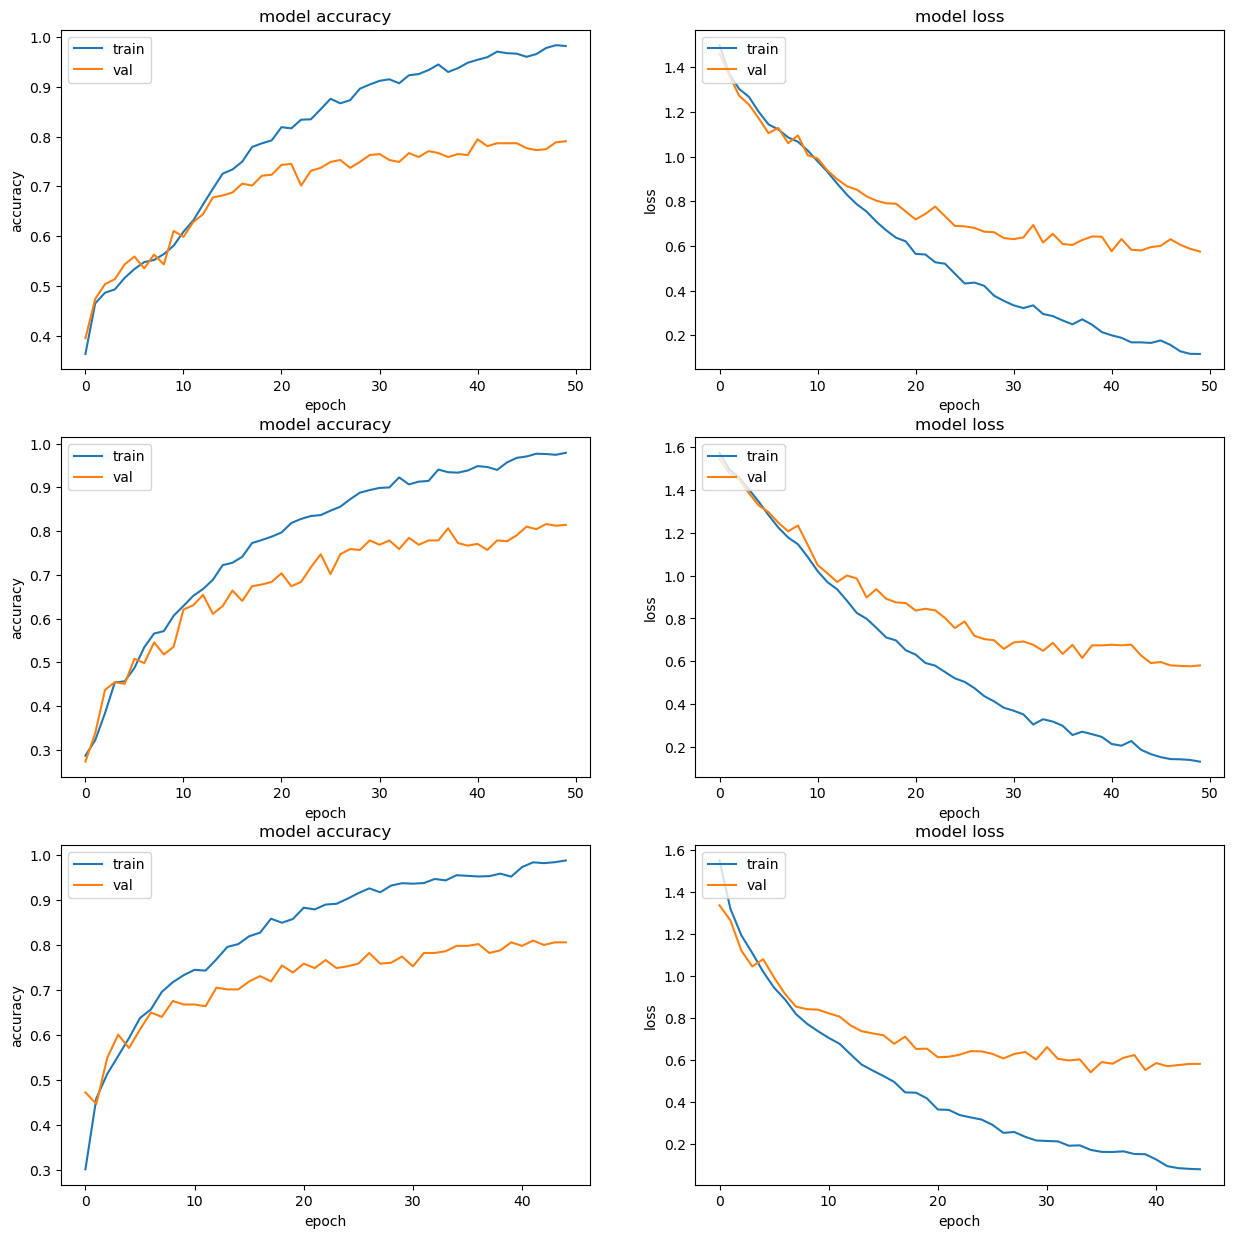

emovo


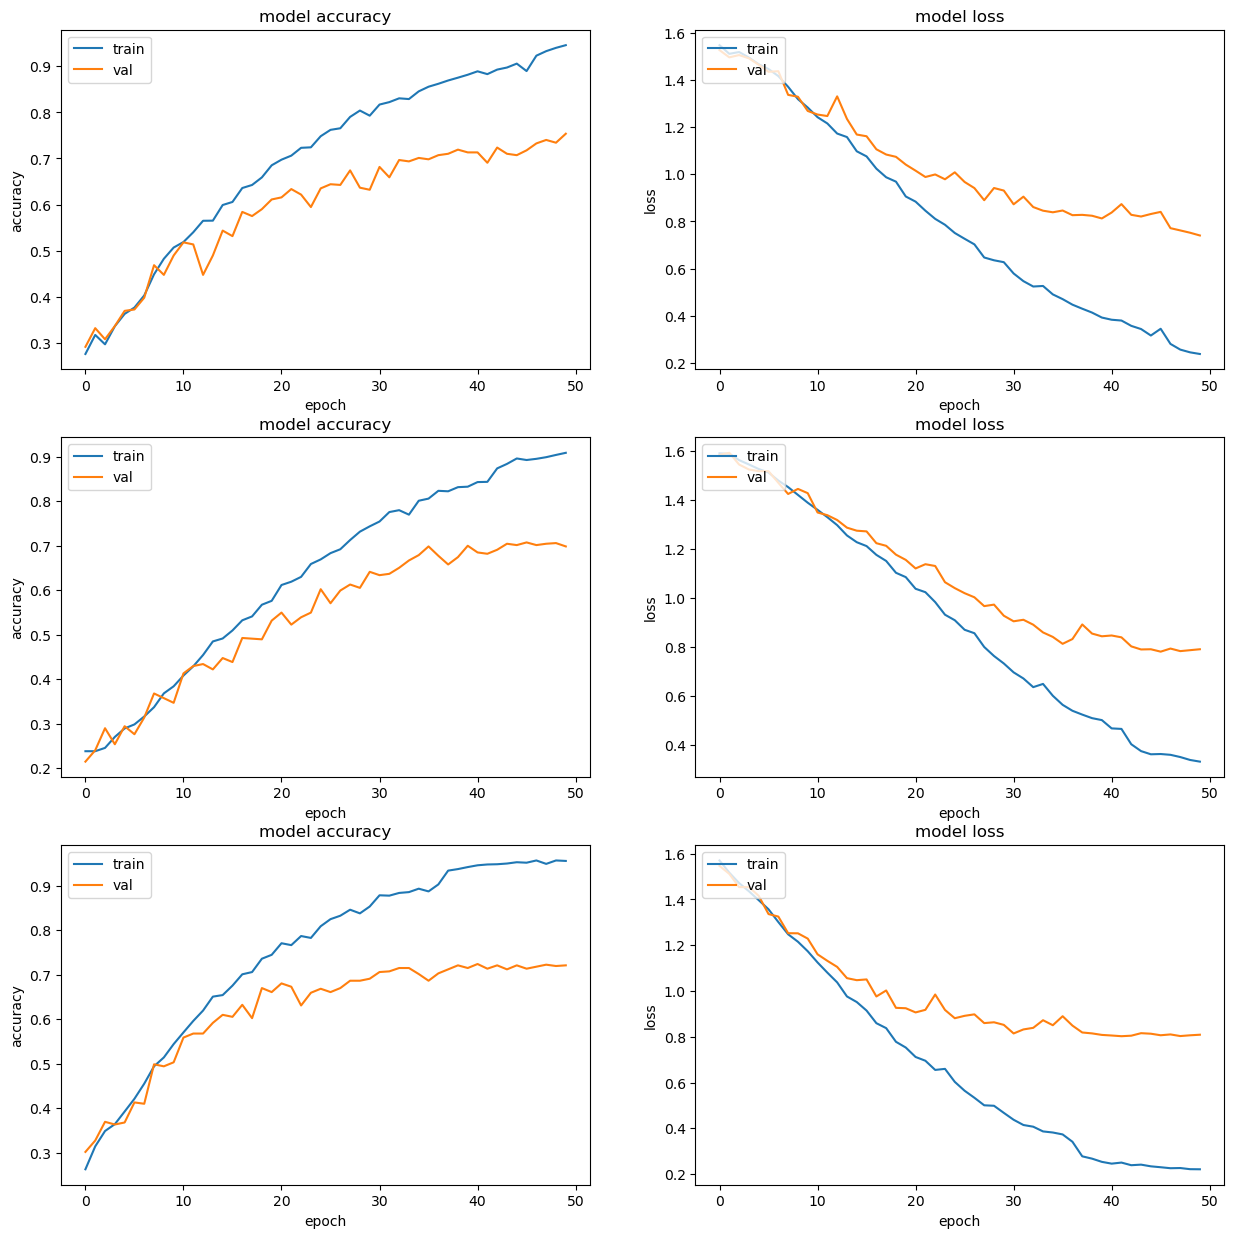

ravdess


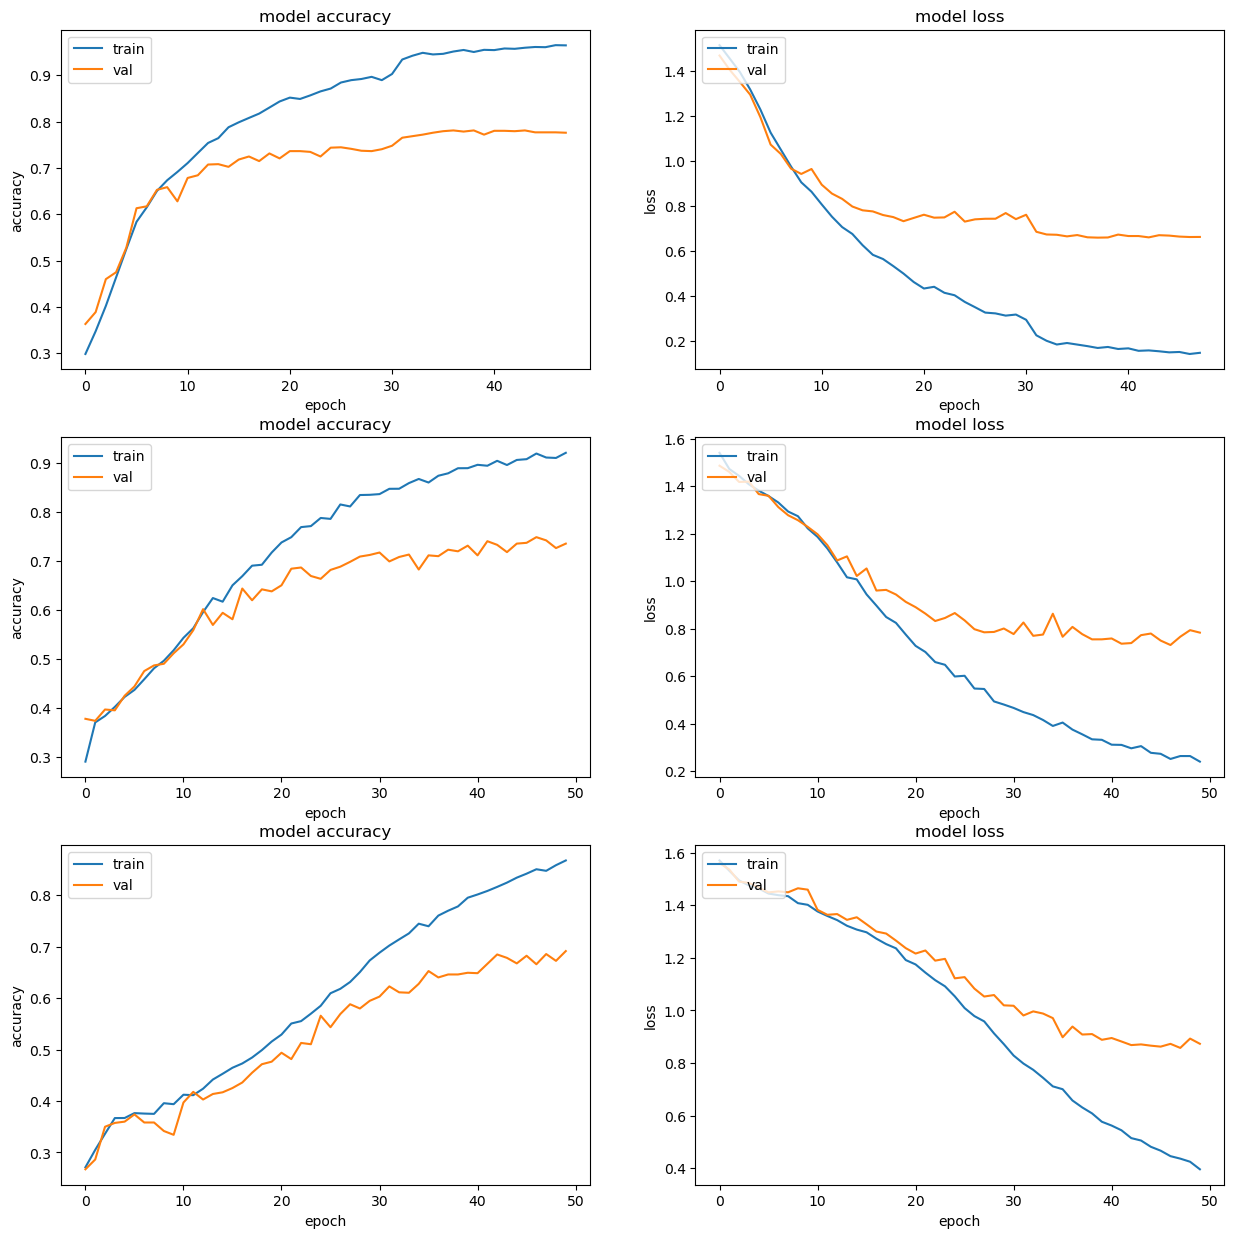


m3
emodb


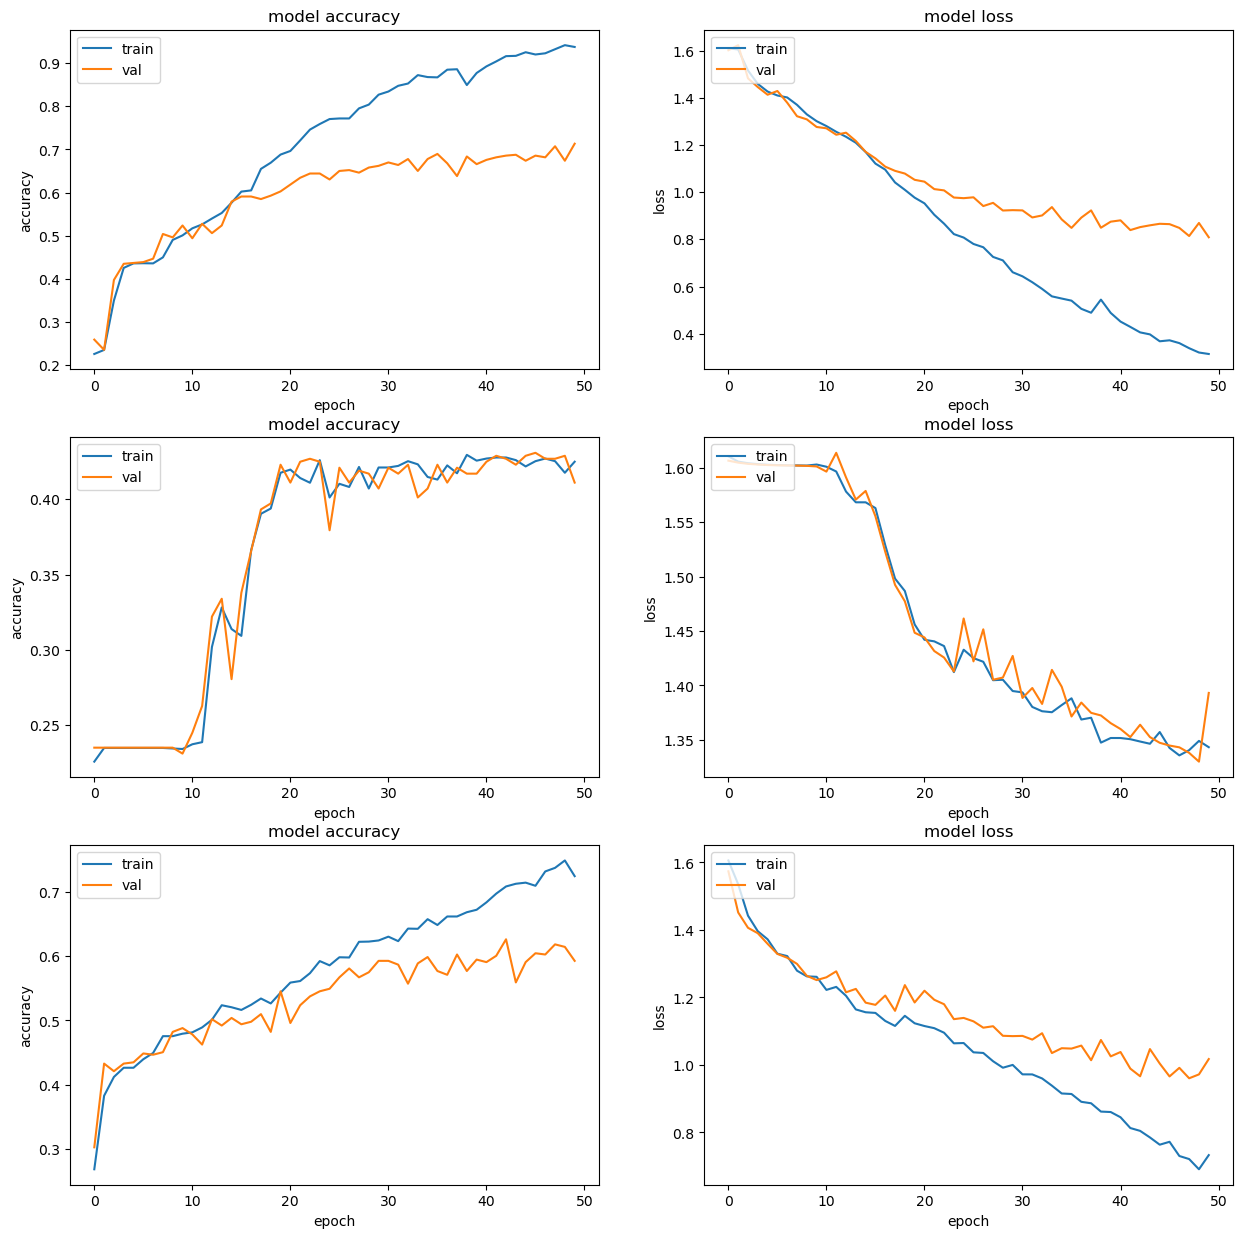

emovo


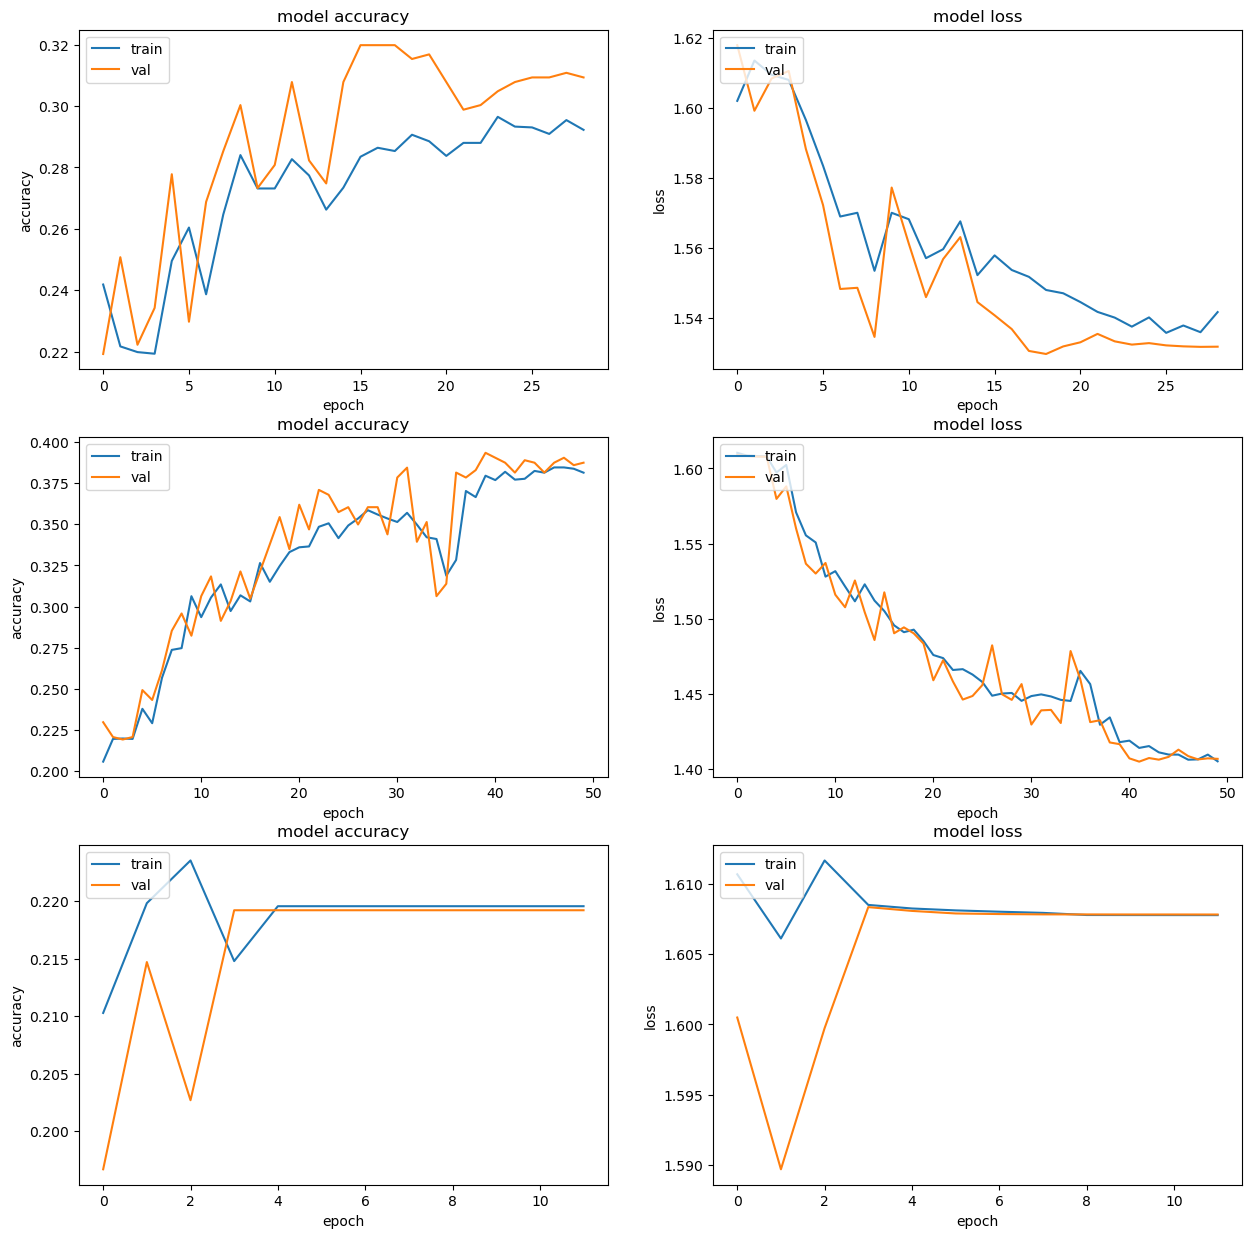

ravdess


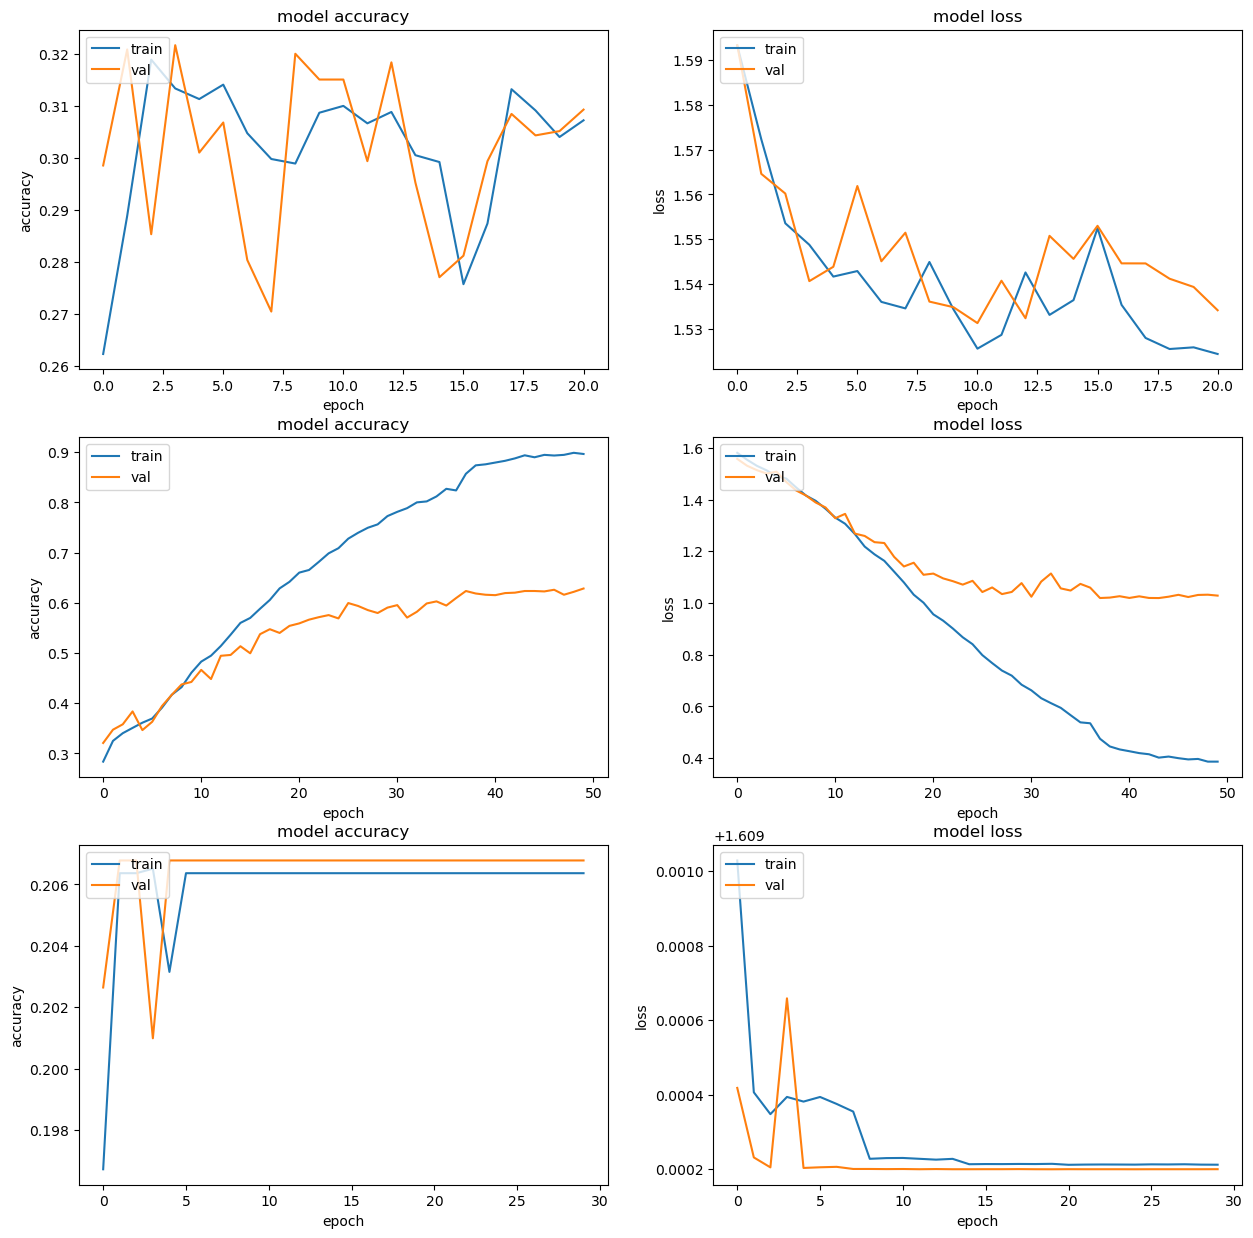


m4
emodb


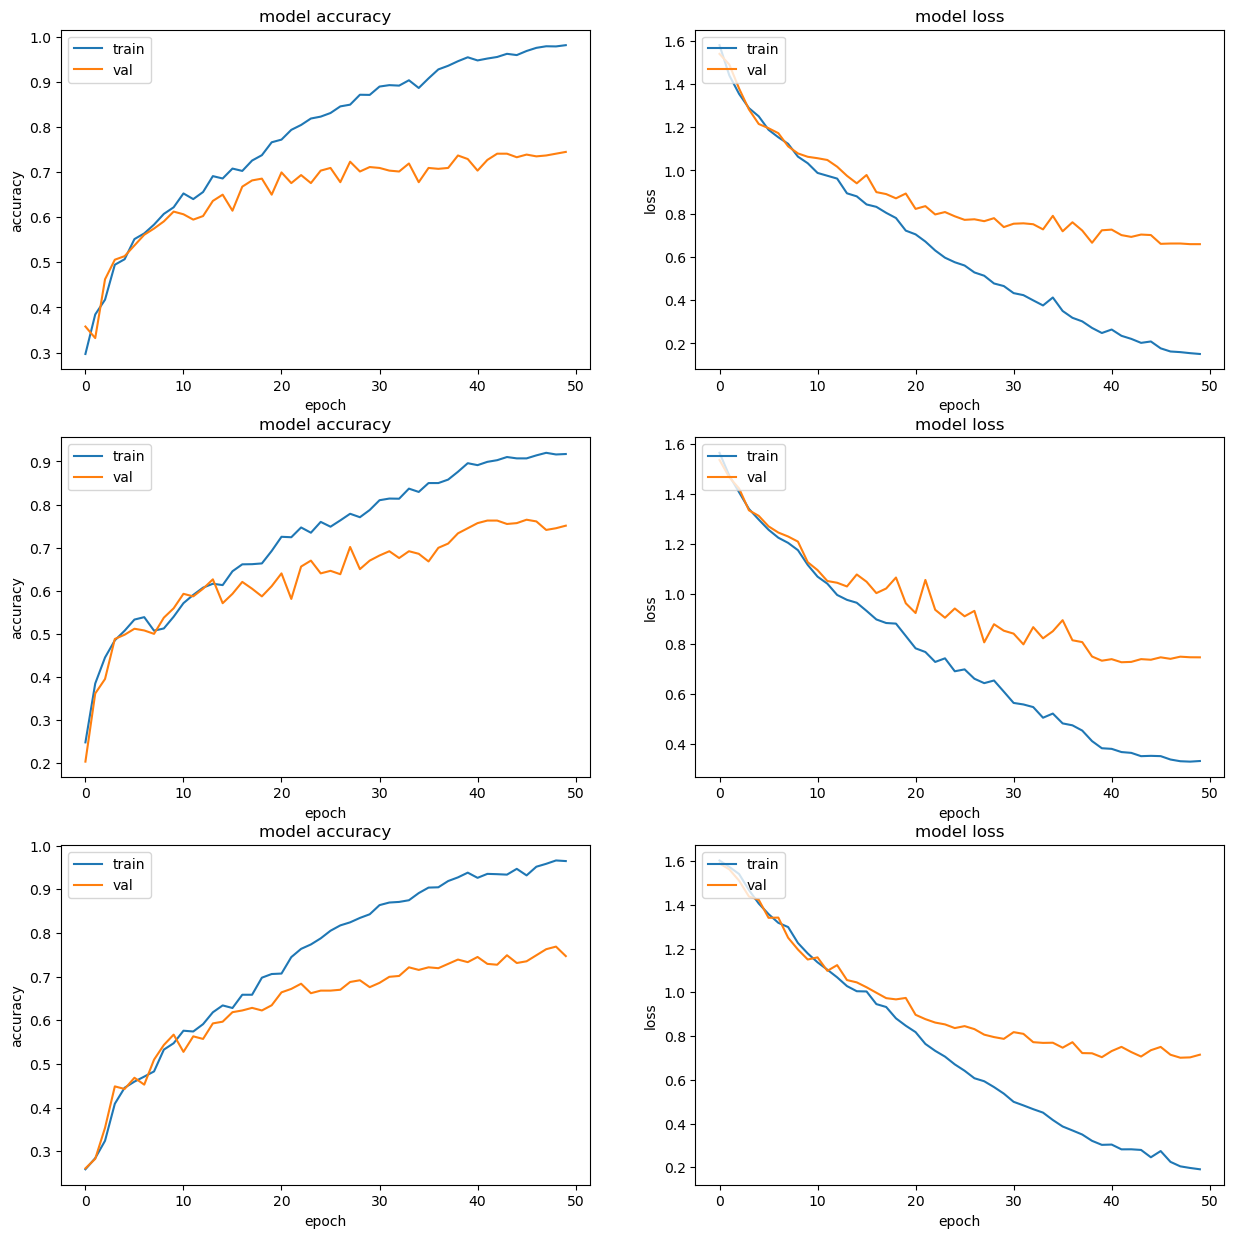

emovo


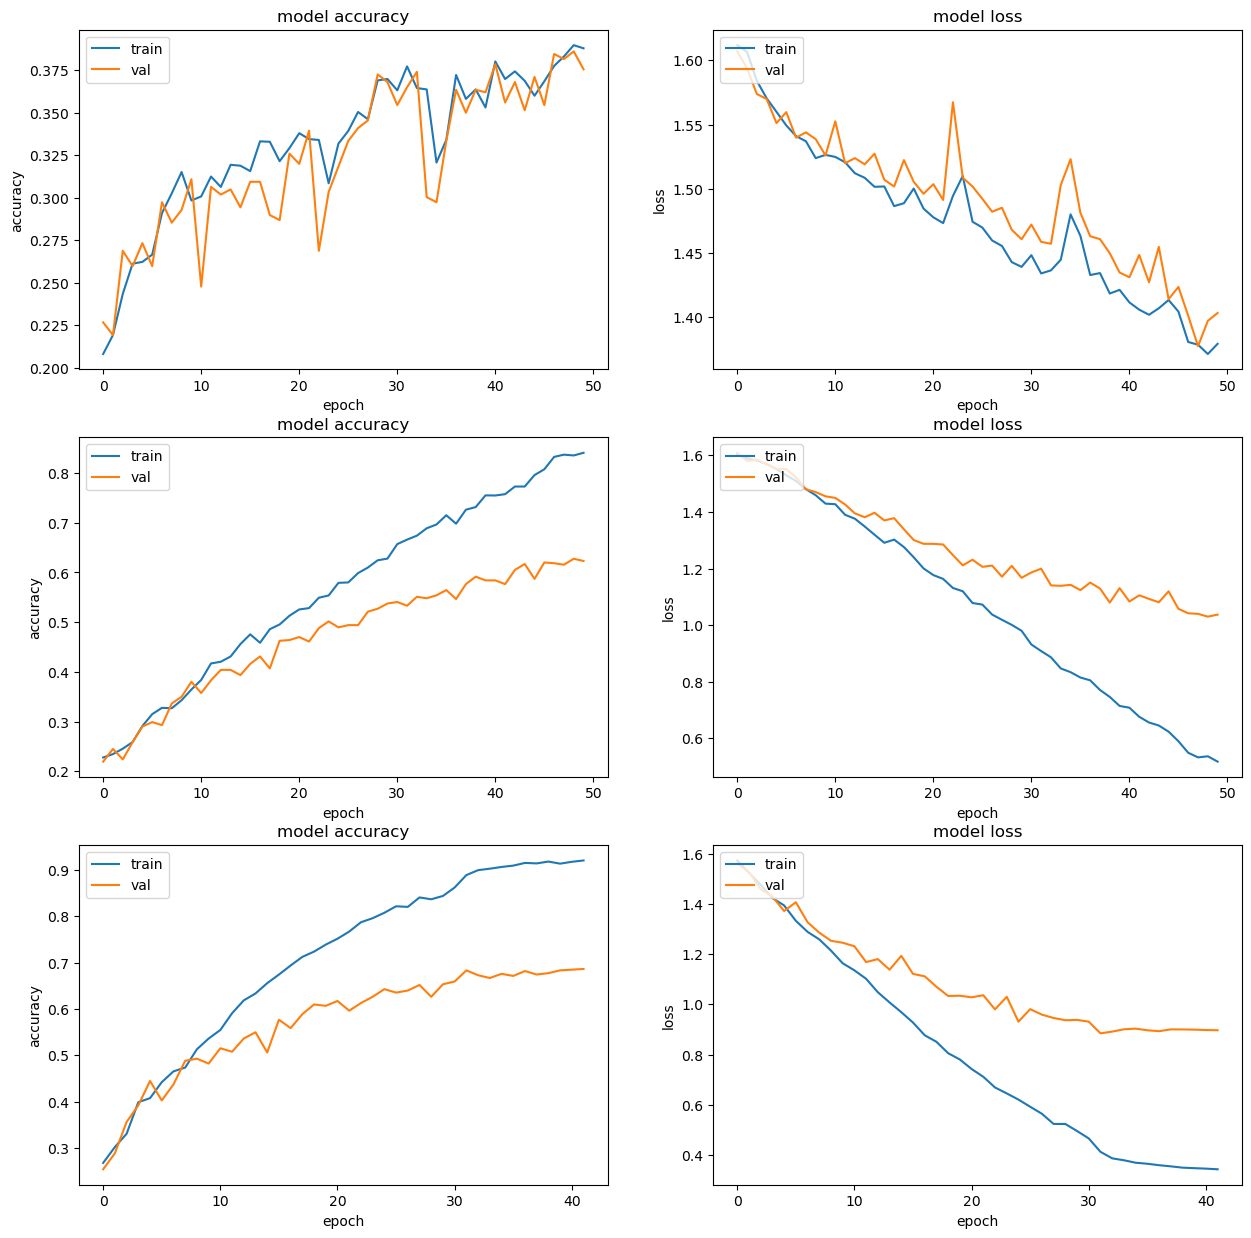

ravdess


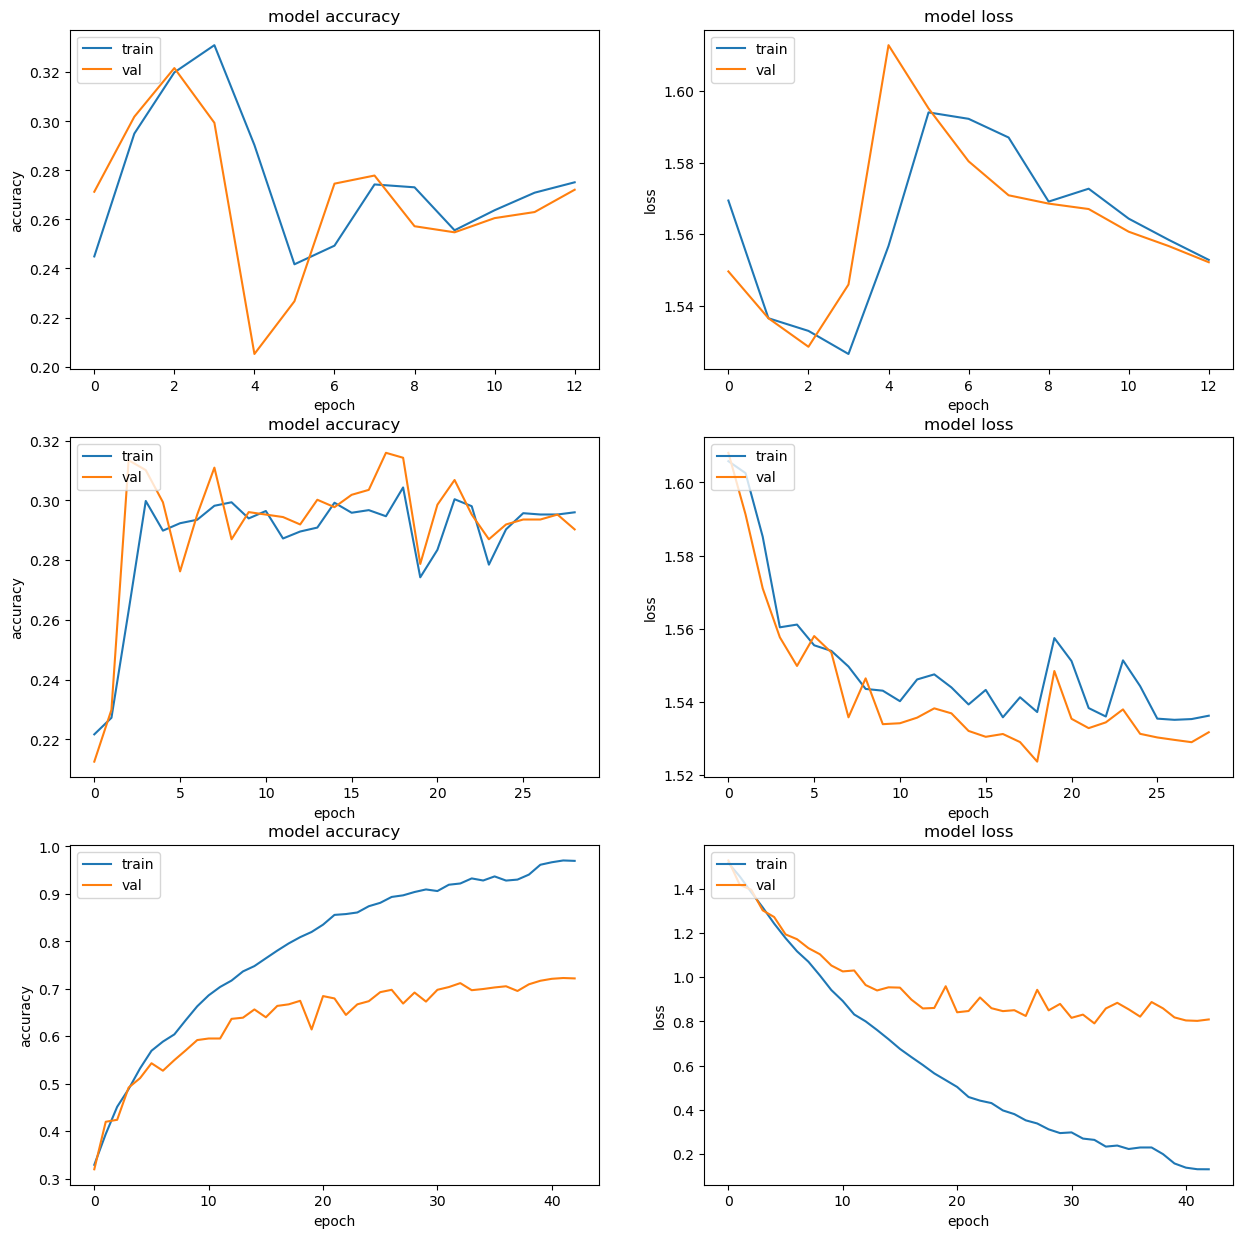


m5
emodb


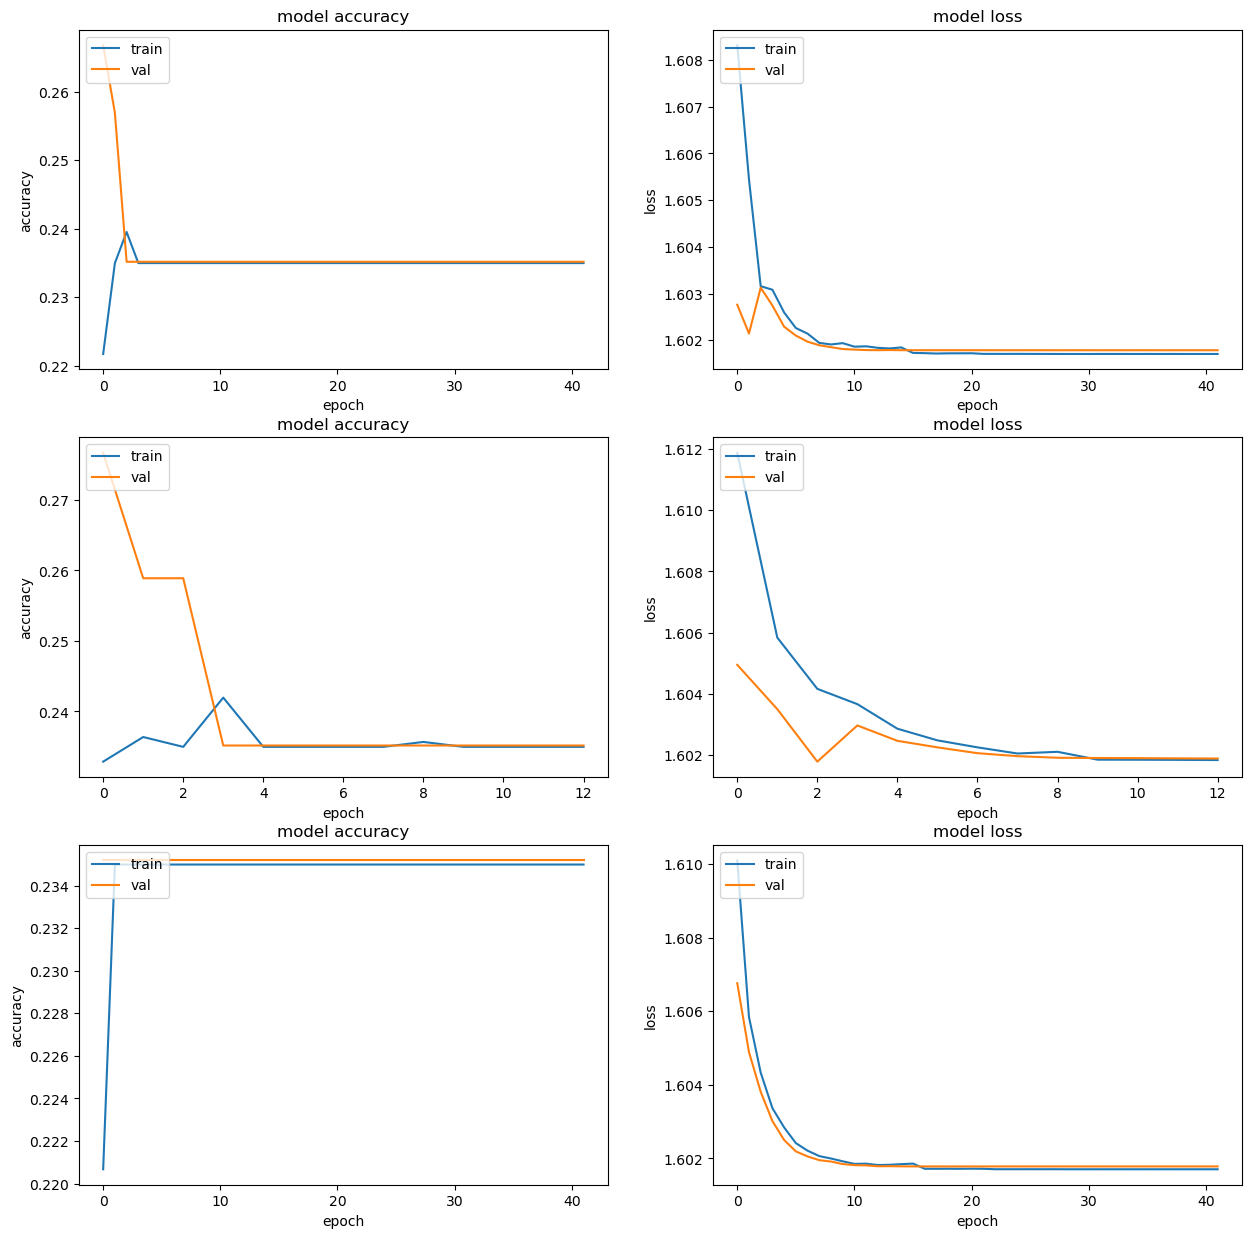

emovo


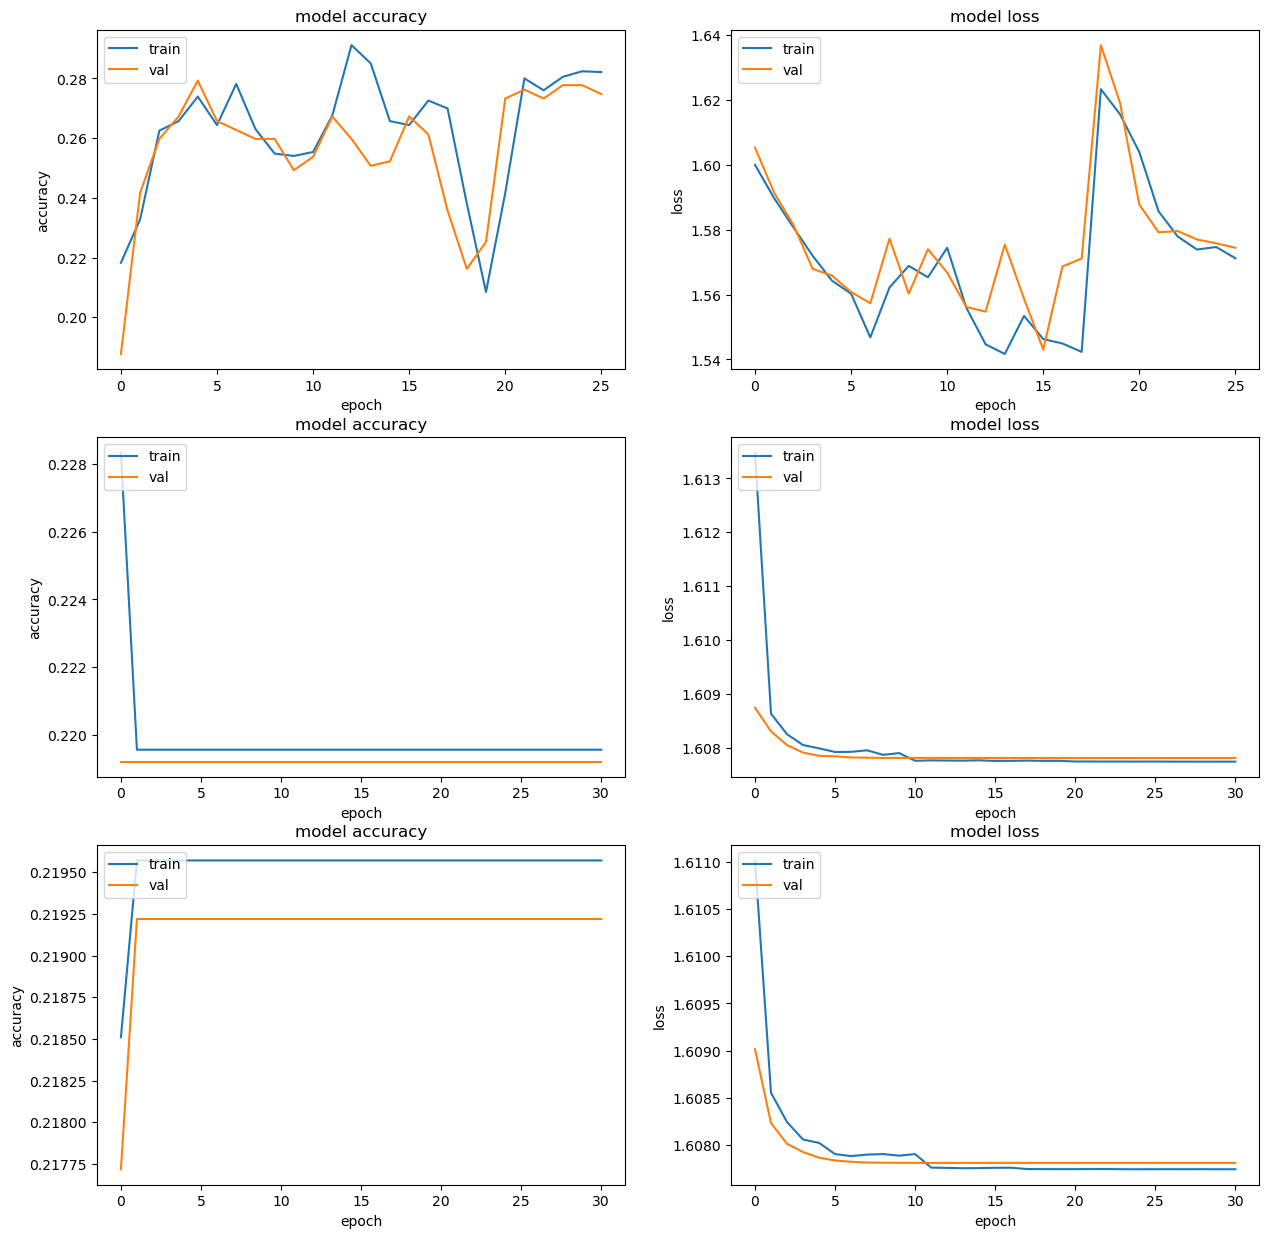

ravdess


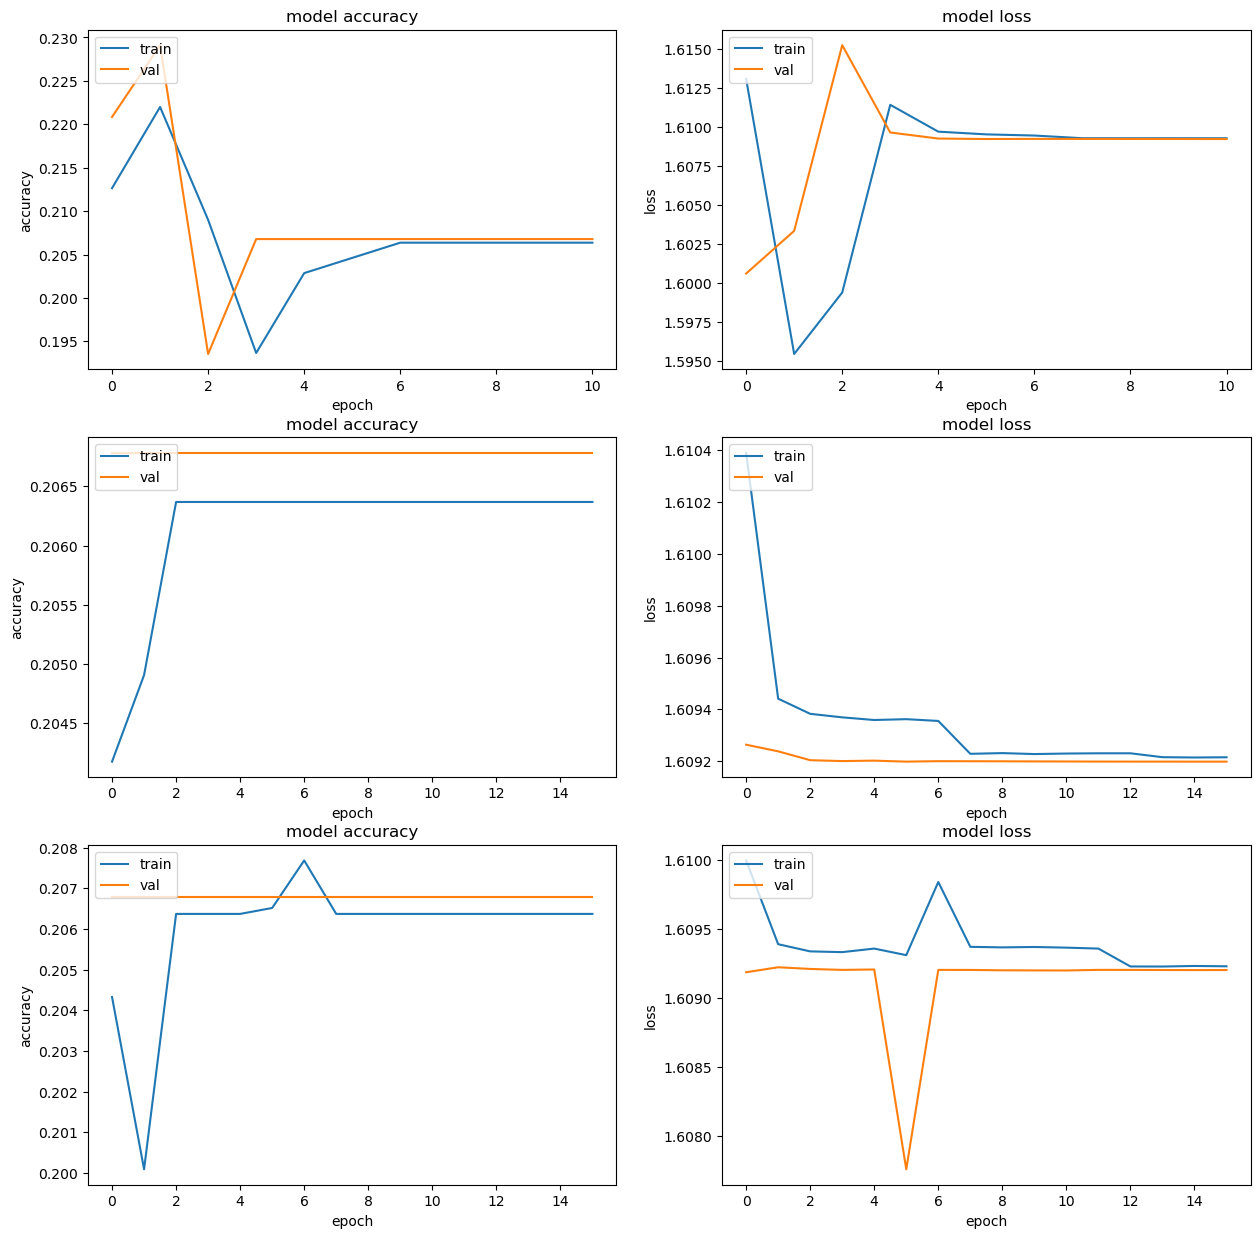


m6
emodb


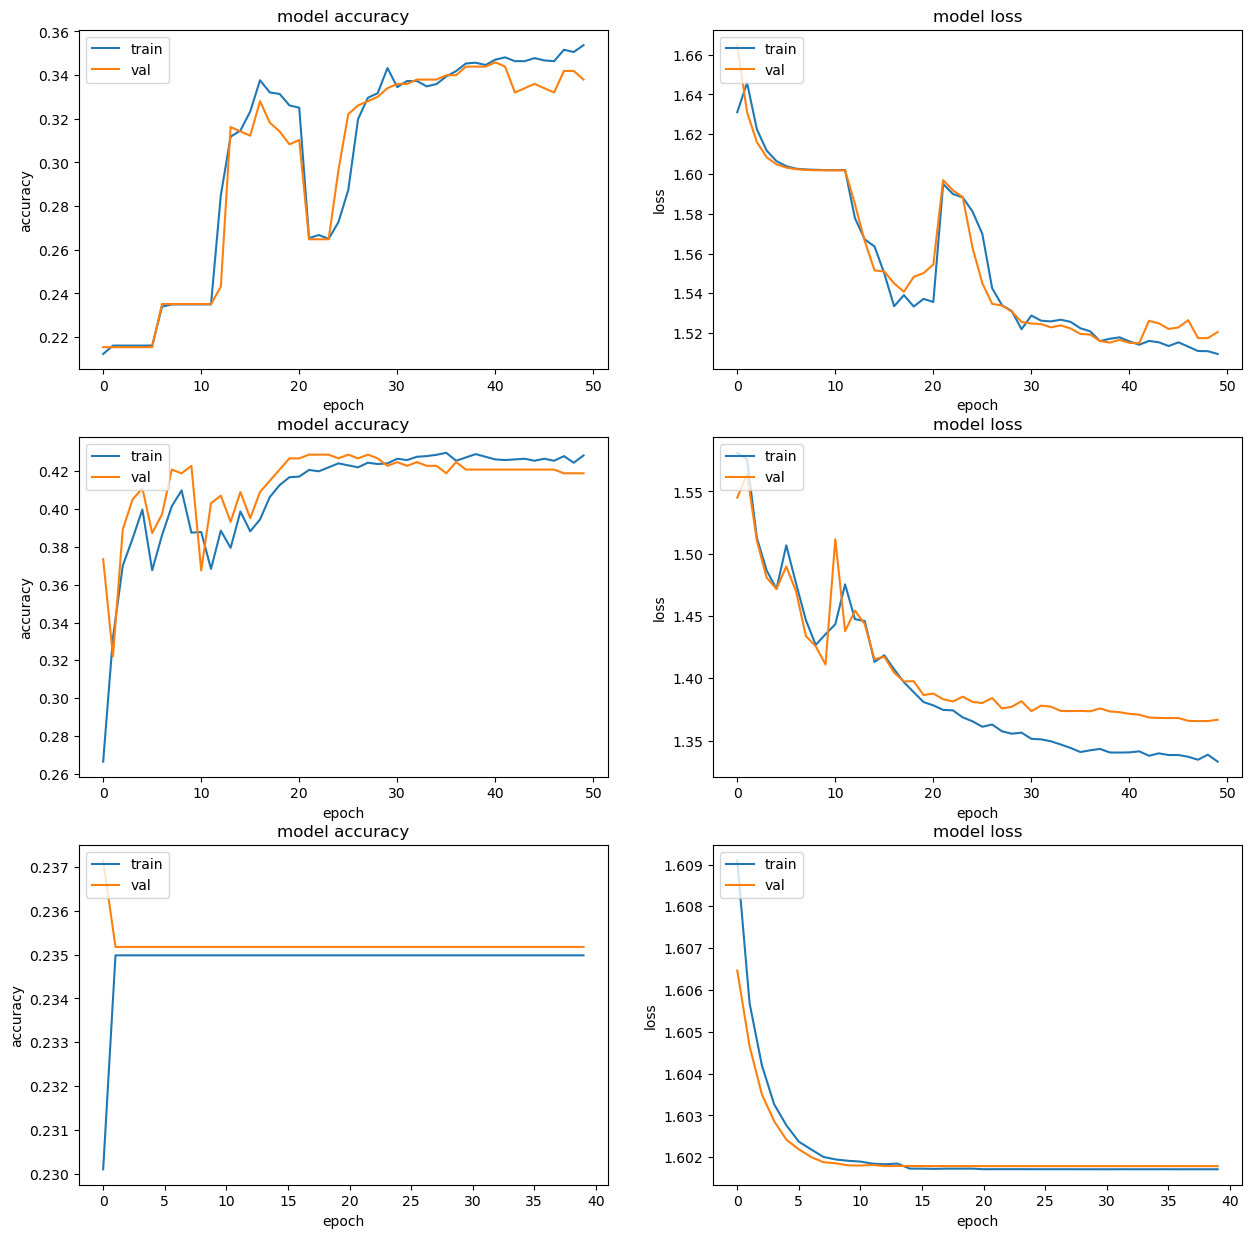

emovo


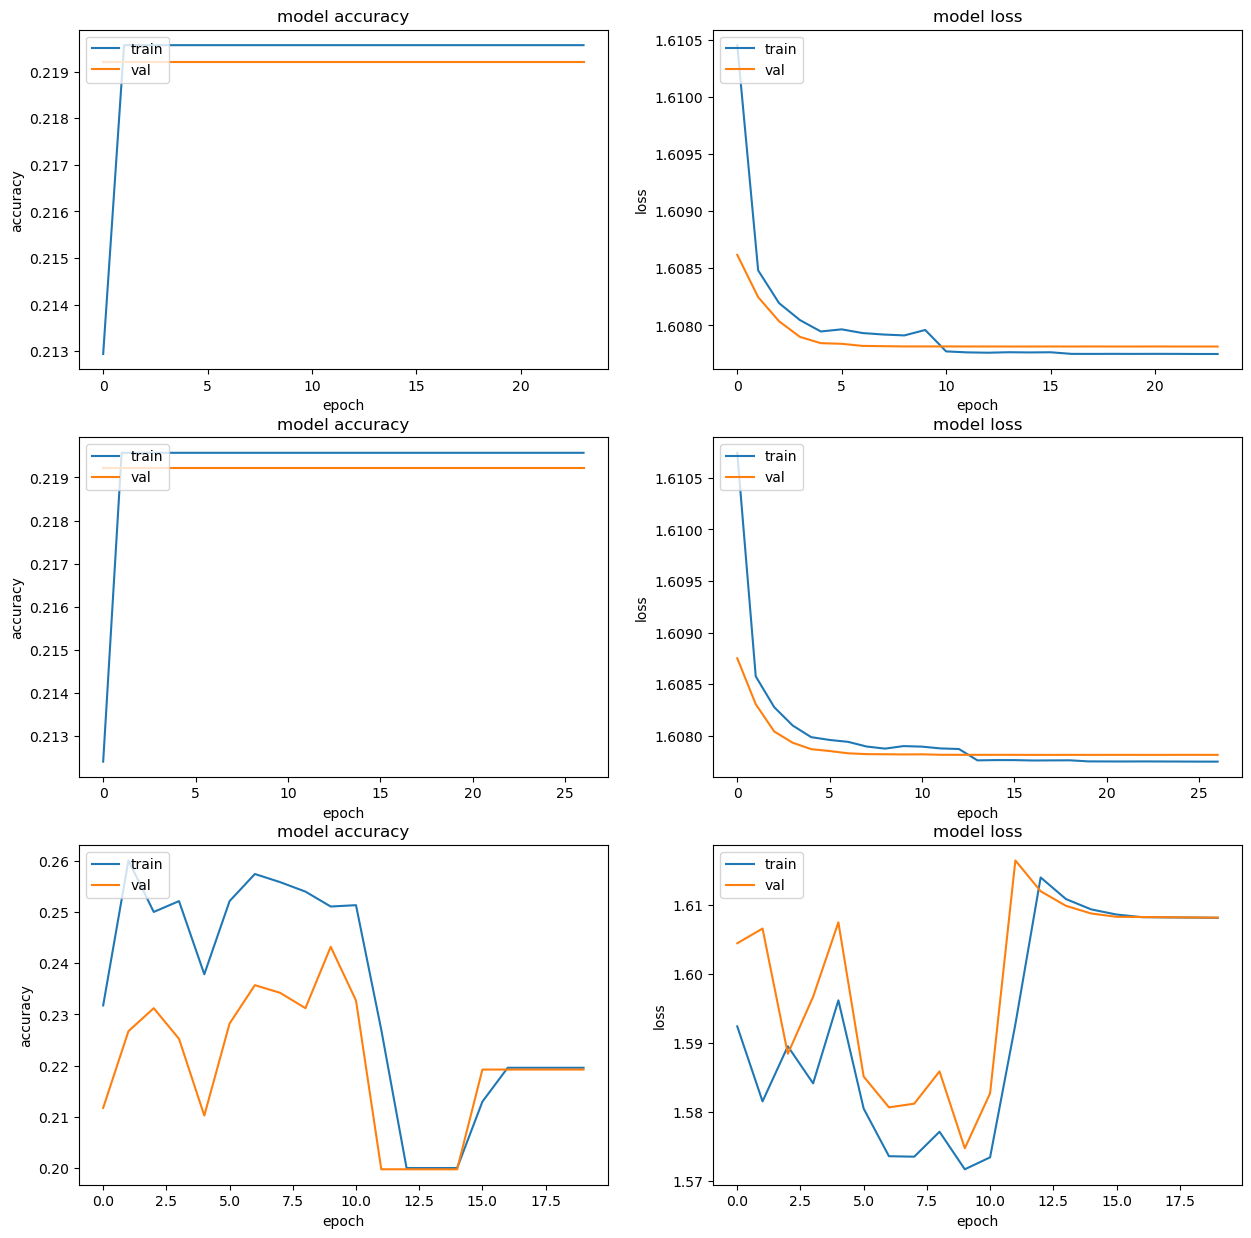

ravdess


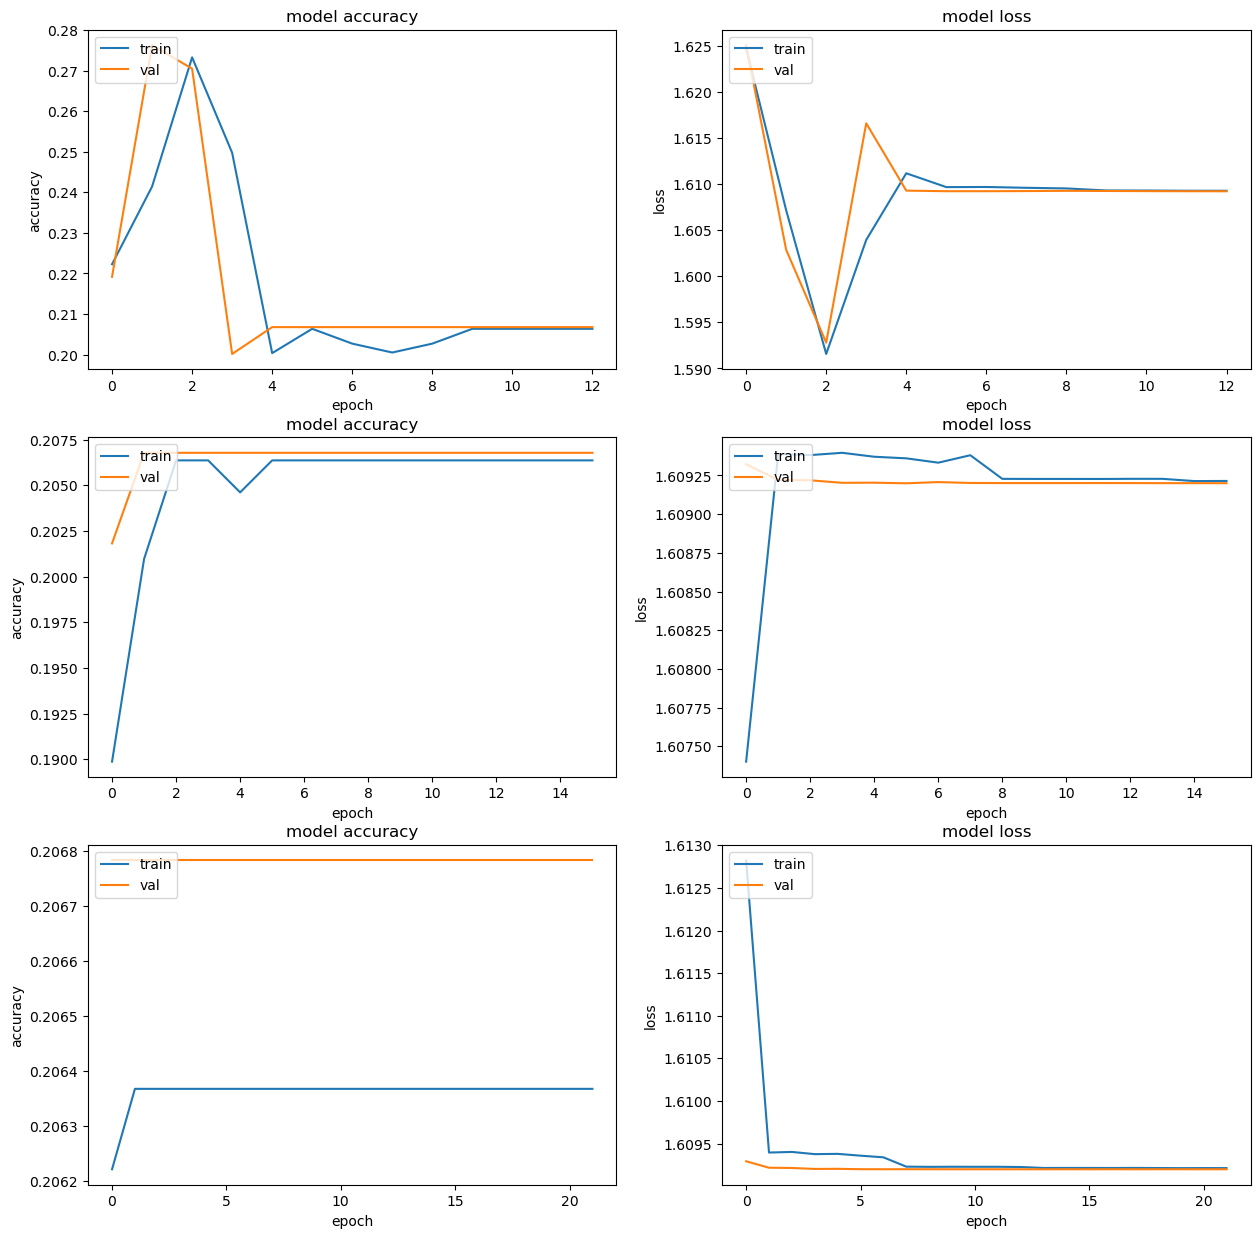

In [23]:
for s in results_arch:
    print(s)
    for d in results_arch[s]:
        print(d)
        plot_stats([p[0] for p in results_arch[s][d]])
    print()